<a href="https://colab.research.google.com/github/Wale-Agboola/UMBC_CAPSTONE_2022/blob/main/Capstone_Product_Categorization_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Data Analysis: Product Categorization And Sales  Prediction

Course code DATA606

          by
     Wale and Tiru

In [ ]:
# install pyldavis for lda visualization

!pip install pyldavis

# Import Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import nltk
import re
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from nltk.tokenize import word_tokenize
from gensim.models import TfidfModel
from sklearn.svm import LinearSVR
from keras.layers import Dropout
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import statsmodels.api as sm
import operator
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from pprint import pprint
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
import pyLDAvis.gensim_models as gensimvis
from gensim.models.coherencemodel import CoherenceModel

nltk.download('stopwords')
from nltk.corpus import stopwords 

import string
# Import the wordcloud library
from wordcloud import WordCloud
exclude = set(string.punctuation) 

from os import path
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Read The Data From URL 

This block of code will be run first to have an access and be able to load the data file to colab without downloading it into our drive. Besides, since our data is from UCI machine learning repositary, the data will be safe and accessible anytime even if UCI website down.

In [ ]:
url= "https://drive.google.com/uc?export=download&id=1UAdGe6egzn8VsFFWqcbKHbXJqAwECiu5"

In [ ]:
df_sheet1= pd.read_excel(url, sheet_name='Year 2009-2010')
df_sheet2= pd.read_excel(url,sheet_name='Year 2010-2011')


In [ ]:
# print(df_sheet1.shape)
# print(df_sheet2.shape)

In [ ]:
#Concatenate the two dataframes to get the entire data from 2009 to 2011
df_all = pd.concat([df_sheet1, df_sheet2])

In [ ]:
#df_all.shape

This pickle portion will be have to contain personal google drive incase you need to load the datafile to your drive. This helps us to save the concatenated dataframe so that we don't need to run the above codes again and again, which take longer time.

In [ ]:
# Pickle the dataframe so that we can load the dataframe directly from the drive
df_all.to_pickle("/content/drive/Shareddrives/Capstone606/retail_df.pkl")  

# Read The Pickled Data From The Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unpickle the dataframe
unpickled_df = pd.read_pickle("/content/drive/Shareddrives/Capstone606/retail_df.pkl")  
unpickled_df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [ ]:
# Change the dataframe name back to the original for simplecity
df_all = unpickled_df

In [ ]:
df_all.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

# Exploratory  Data Analysis for Retail Data

In [ ]:
df_all.shape

(1067371, 8)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


The data contains null values in two of its columns, customerId and Description. We keep the customerId column since the number of entries are very significant and we don't want the customer Id for our analysis. However, our analysis uses Descrpition column so we drop the null values in descrption column.

In [ ]:
df_all.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
df_all = df_all.dropna(axis=0, subset=['Description'])

## Negative Values of Quantity 

In [ ]:

neg_Q=df_all[df_all.Quantity < 0]
neg_Q

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
540449  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541  C581499         M                            Manual        -1   
541715  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate   Price  Customer ID         Country  
178    2009-12-01 10:33:00    2.95      16321.0       Australia  
179    2009-12-01 10:33:00    1.65      16321.0       Australia  
180    2009-12-01 10:33:00    4.25      16321.0       Australia  
181    2009-12-01 10:33:00    2.10      16321.0       Australia  
182    2009-12-01 10:33:00    2.95      16321.0       Australia  
...                    ...     ...          ...             ...  
540449 2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
541541 2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
541715 2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
541716 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
541717 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[20261 rows x 8 columns]

In [ ]:
#df_all['Quantity'] = df_all['Quantity'].abs() #Assigns positives to the orginal column

#or

df_all['Abs Quantity'] = df_all['Quantity'].abs() #Creates a new column keeping old one for records

In [ ]:
df_all.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Abs Quantity  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            12  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom            48  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            24

We are converting the negative quantities in the data frame to positives because where the data was collected there was no indication of what the negative values mean and also alot of the negative quantities have positive prices associated with them while some have zero price so we cannot reasonably say for certain that they are somehow related to returns. 

## Zero Price

In [ ]:
zero_p = df_all[df_all.Price ==0]
zero_p

Invoice StockCode                   Description  Quantity  \
263     489464     21733                  85123a mixed       -96   
283     489463     71477                         short      -240   
284     489467    85123A                   21733 mixed      -192   
3162    489660     35956                          lost     -1043   
3168    489663    35605A                       damages      -117   
...        ...       ...                           ...       ...   
535336  581213     22576                         check       -30   
536910  581226     23090                       missing      -338   
538504  581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505  581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538925  581422     23169                       smashed      -235   

               InvoiceDate  Price  Customer ID         Country  Abs Quantity  
263    2009-12-01 10:52:00    0.0          NaN  United Kingdom            96  
283    2009-12-01 10:52:00    0.0          NaN  United Kingdom           240  
284    2009-12-01 10:53:00    0.0          NaN  United Kingdom           192  
3162   2009-12-01 17:43:00    0.0          NaN  United Kingdom          1043  
3168   2009-12-01 18:02:00    0.0          NaN  United Kingdom           117  
...                    ...    ...          ...             ...           ...  
535336 2011-12-07 18:38:00    0.0          NaN  United Kingdom            30  
536910 2011-12-08 09:56:00    0.0          NaN  United Kingdom           338  
538504 2011-12-08 13:58:00    0.0          NaN  United Kingdom           240  
538505 2011-12-08 13:58:00    0.0          NaN  United Kingdom           300  
538925 2011-12-08 15:24:00    0.0          NaN  United Kingdom           235  

[1820 rows x 9 columns]

We are droping the entries that have $0 prices for nonw because it will potentially skew our results and will not help our models perform any better. So this is to ensure better performance overall.

In [ ]:
zero_p.shape

(1820, 9)

In [ ]:
df_all= df_all[df_all.Price > 0]

In [ ]:
df_all['Invoice Date'] = pd.to_datetime(df_all['InvoiceDate']).dt.date
df_all['Invoice Time'] = pd.to_datetime(df_all['InvoiceDate']).dt.time

In [ ]:
df_all.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Abs Quantity  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom            48   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            24   

  Invoice Date Invoice Time  
0   2009-12-01     07:45:00  
1   2009-12-01     07:45:00  
2   2009-12-01     07:45:00  
3   2009-12-01     07:45:00  
4   2009-12-01     07:45:00

Creating our Sale column to be used later for our prediction model. It uses the price multiplied by the quantity column to come up with the sale price. 

In [ ]:
# Create the sale column in the dataframe
df_all['Sale'] = df_all['Abs Quantity'] * df_all['Price']

df_all.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Abs Quantity  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom            48   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            24   

  Invoice Date Invoice Time   Sale  
0   2009-12-01     07:45:00   83.4  
1   2009-12-01     07:45:00   81.0  
2   2009-12-01     07:45:00   81.0  
3   2009-12-01     07:45:00  100.8  
4   2009-12-01     07:45:00   30.0

In [ ]:
df_all.shape

(1061164, 12)

As we saw the data above, it has some null values, negative value quanitities and 0 value prices which may have an impact on our visualization. Thus We cleaned the data in colab first and saved it back to excel sheets before we visualize it on tableau.

In [ ]:
# save_exl = pd.ExcelWriter('/content/drive/Shareddrives/Capstone606/retail_clean.xlsx')

# df_all.iloc[:499428].to_excel(save_exl, sheet_name = 'Year 2009-2010', index = False)
# df_all.iloc[499428:].to_excel(save_exl, sheet_name = 'Year 2010-2011', index = False)

# save_exl.save()

The following screenshots are taken from tableau to see the visualizations we can draw from the retail data that makes more sense to the untrained eye. 

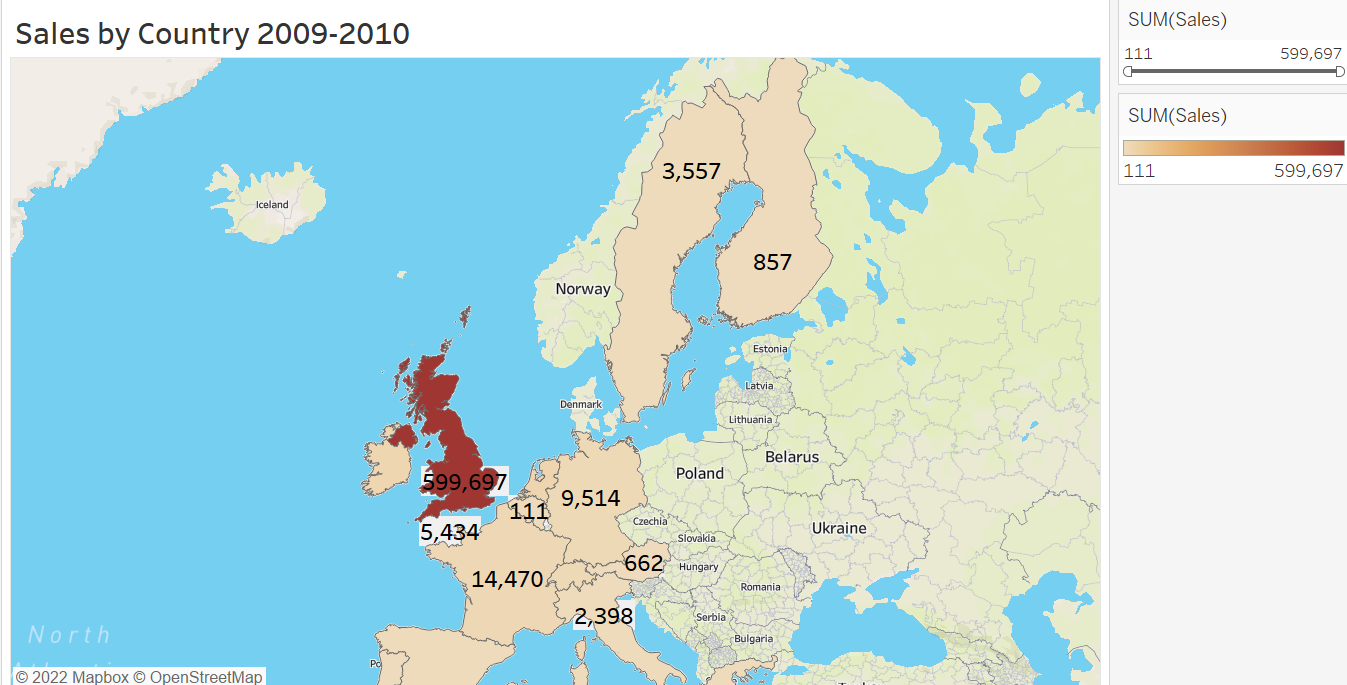

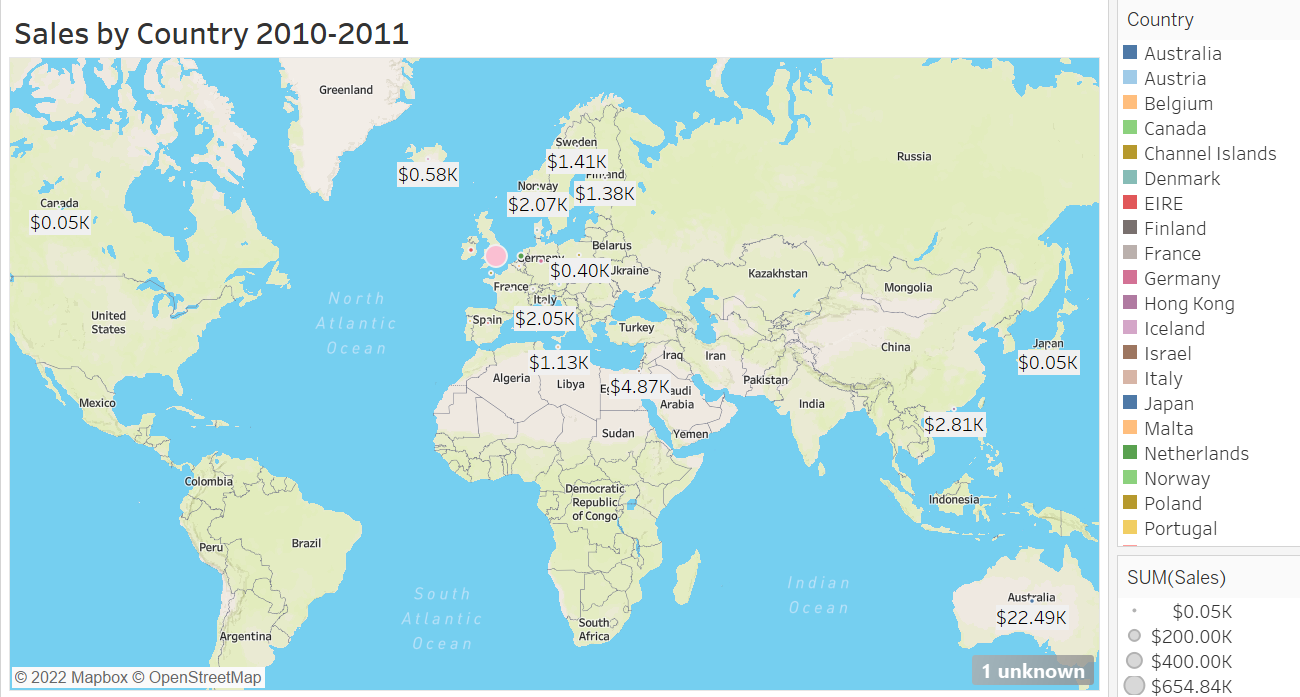

The above two maps show the total sales for each country from 2009 to 2011.

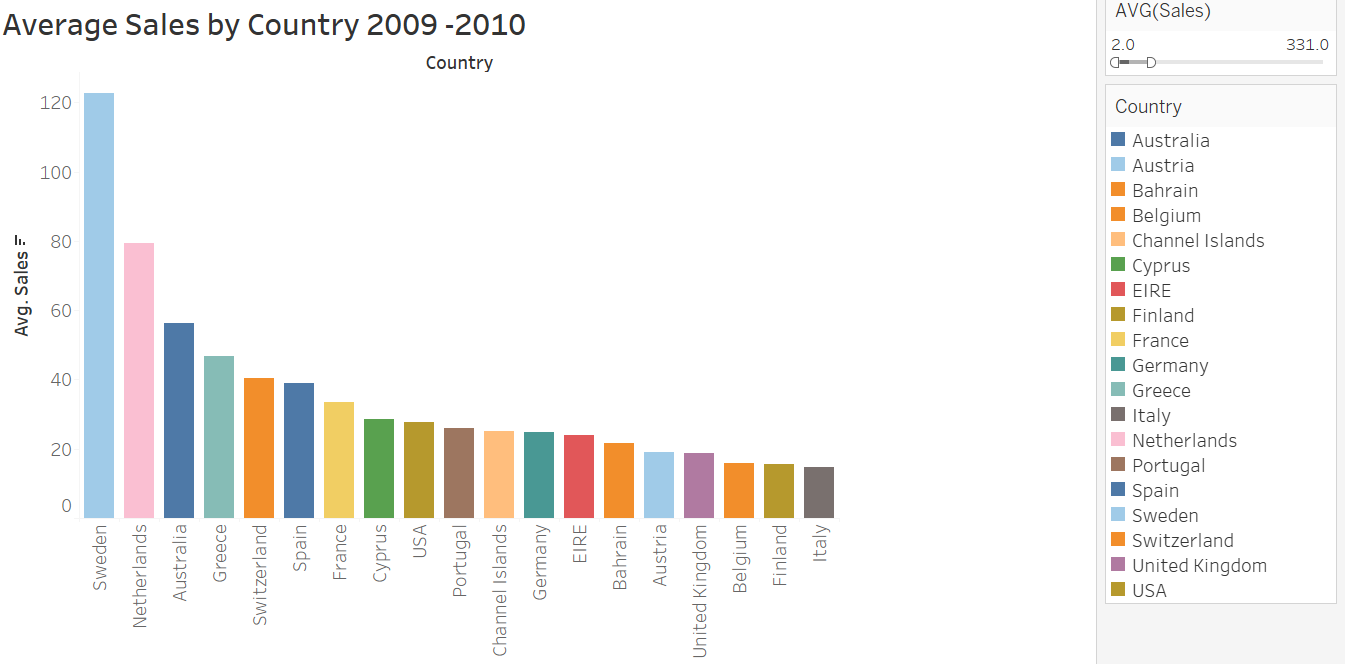

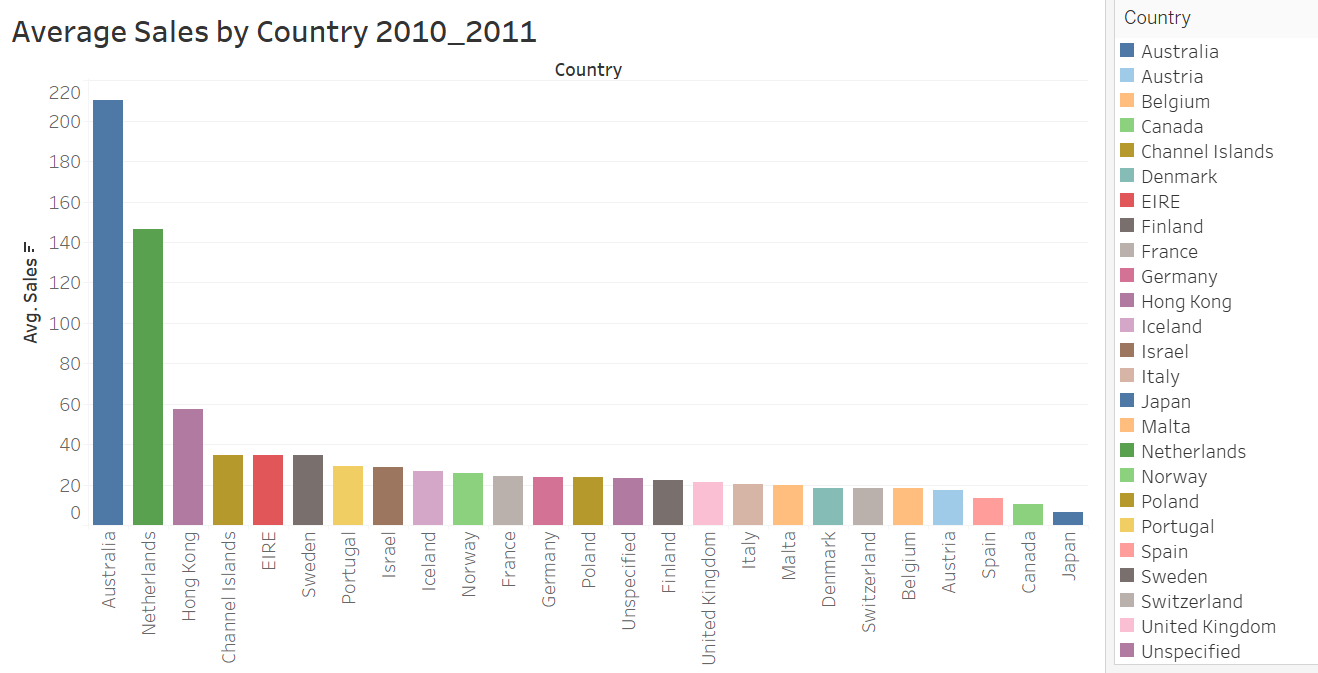

The average sales by countries from 2009 to 2011, on the first graph from 2009 to 2010 Sweden had the largest average sale wheras, on the second graph from 2010 to 2011 Australia took first place in average sales. 

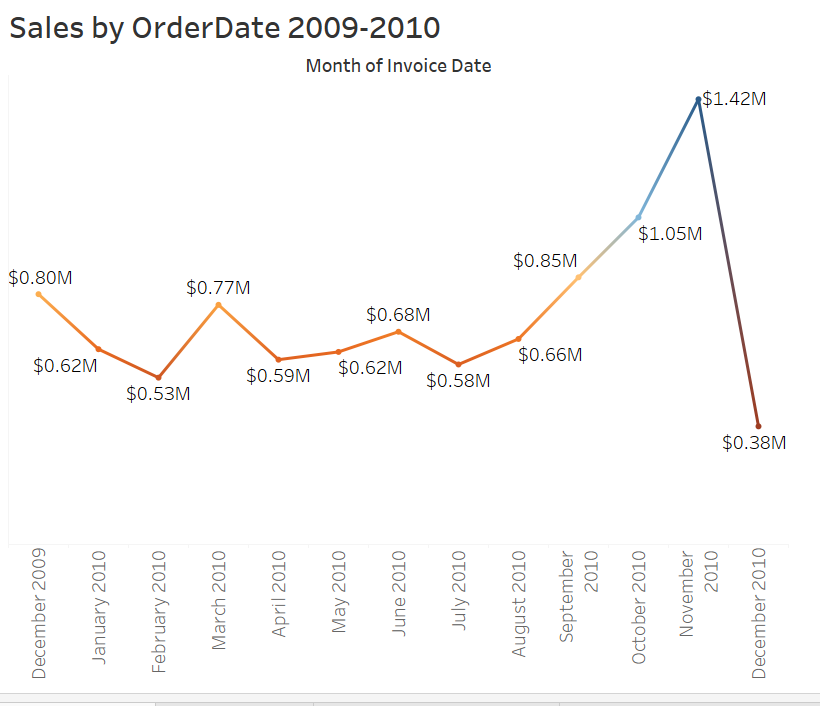


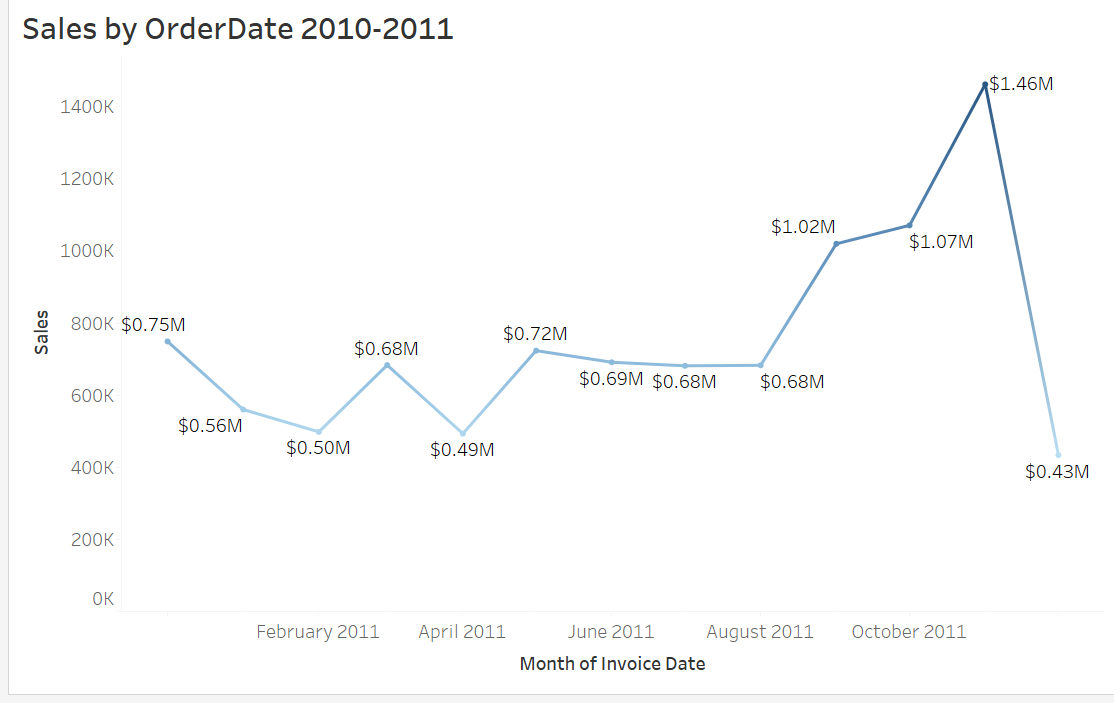

Sales by invoce dates shows the total sales by dates. As we can see from the two graphs above, the sales have some seasonal trends and fluctuating throughout the year except it hits its peak around end of october, which makes sense, that is the holiday season and gets its lowest around end of December. This is a good visualization to help corporate advertisers see what sections of the year need better advertising and which sections they could save on advertisment costs.

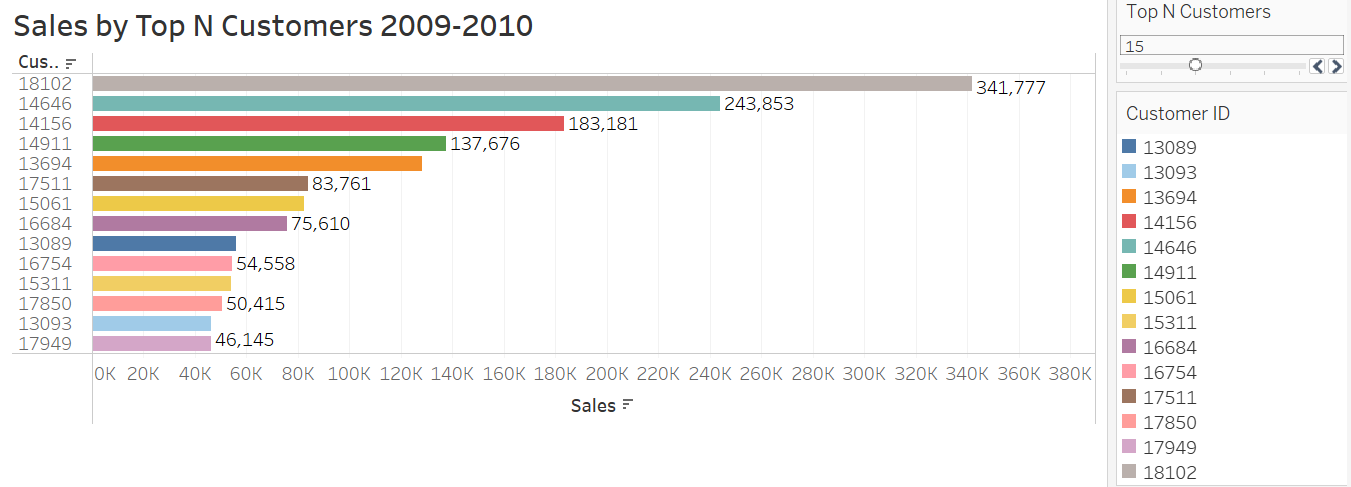



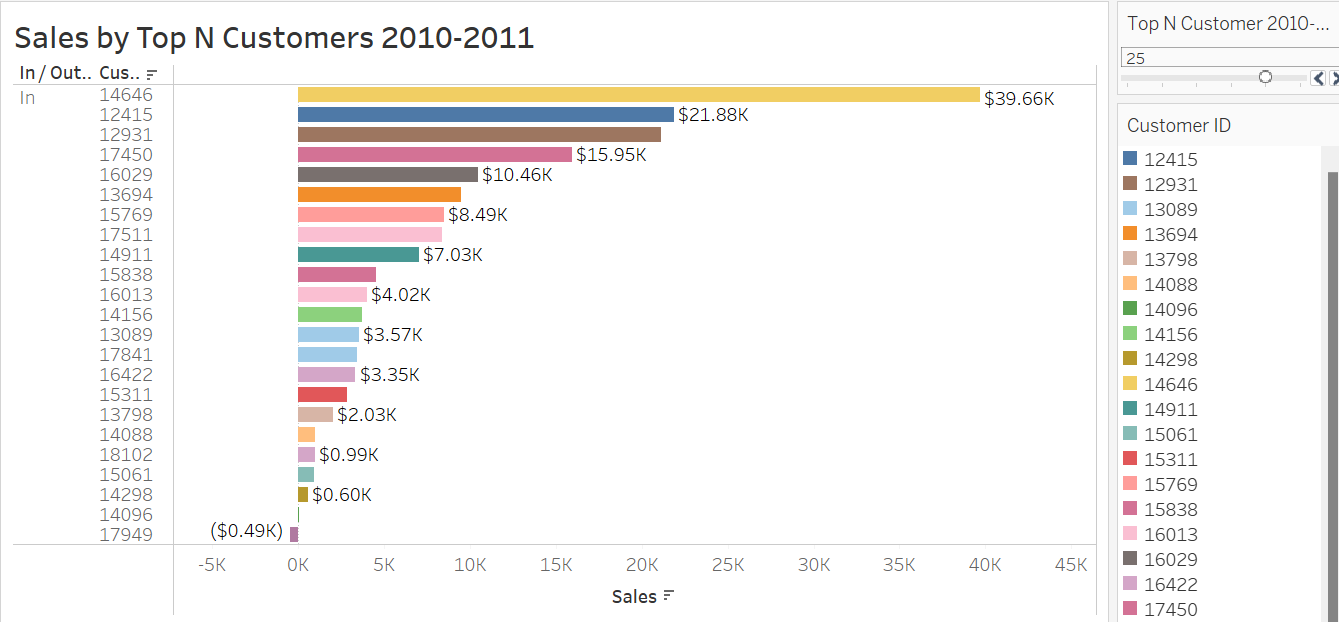

Sales by top N customers graphs show that the top 5 to 30 customers by  sales from 2009 to 2011. The top customers who purchased highest sales during those years. 

## The Tableau Dashboard links attched below

https://public.tableau.com/app/profile/tiru4468/viz/Retail_DataAnalysis2009-2010/CustomerAnalysisfor2009to2010?publish=yes


https://public.tableau.com/app/profile/tiru4468/viz/Retail_DataAnalysis2010-2011/Dashboard2


## Addtional Visualization

Text(0, 0.5, 'Sales')

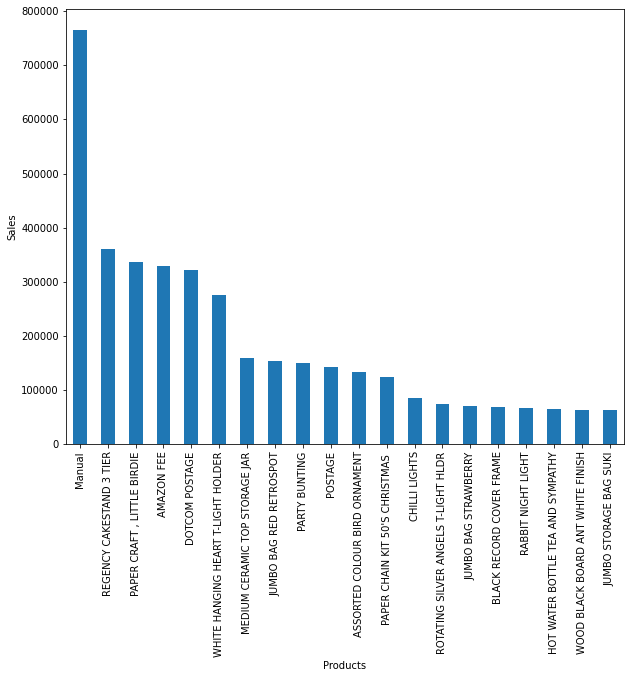

In [ ]:
plot = df_all.groupby("Description")["Sale"].sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,8))
plt.xlabel("Products")
plt.ylabel("Sales")

Visualization above shows the top 20 products with the highest sales. 

# Natural Languge Processing for data analysis

## Preprocessing the data (Description column)

*  Tokenization : Split the text into words
*   Normalization : Lemmetization, Stemming etc. to transform a word into its 
base form.
*   Remove Stopwords 
*   Change the words into Lowercase form

*   Remove punctuations, special characters, single quotes, numbers using Regular Expressions (re)









### Cleaning the data

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'use','15cm','set','large','small','medium'])
def cleandata(desc):
    
    tokens = word_tokenize(str(desc))
    # convert to lower case
    tokens = [w.lower() for w in tokens] 
    # Remove stop words 
    tokens = [w for w in tokens if not w in stop_words]
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(tokens))
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # remove single quotes
    text = re.sub("\'", "", text)  
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Remove numbers
    text = re.sub(r'\d+','' , text)
    #text= text.split()
    
    return text
df_all['Desc_processed']= df_all['Description'].apply(cleandata)  # put the processed text into the dataframe

df_all.tail()



Invoice StockCode                      Description  Quantity  \
541905  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                          POSTAGE         1   

               InvoiceDate  Price  Customer ID Country  Abs Quantity  \
541905 2011-12-09 12:50:00   2.10      12680.0  France             6   
541906 2011-12-09 12:50:00   4.15      12680.0  France             4   
541907 2011-12-09 12:50:00   4.15      12680.0  France             4   
541908 2011-12-09 12:50:00   4.95      12680.0  France             3   
541909 2011-12-09 12:50:00  18.00      12680.0  France             1   

       Invoice Date Invoice Time   Sale                     Desc_processed  
541905   2011-12-09     12:50:00  12.60         children apron dolly girl   
541906   2011-12-09     12:50:00  16.60      childrens cutlery dolly girl   
541907   2011-12-09     12:50:00  16.60   childrens cutlery circus parade   
541908   2011-12-09     12:50:00  14.85           baking  piece retrospot   
541909   2011-12-09     12:50:00  18.00                           postage

In [ ]:
df_all.shape

(1061164, 13)

In the function above we are cleaning the data specifically in the description column to prepare it for our NLP model later on. We are clearing the description column of any unnecessary stop words, numbers and symbols that won't assist in our model performance. 

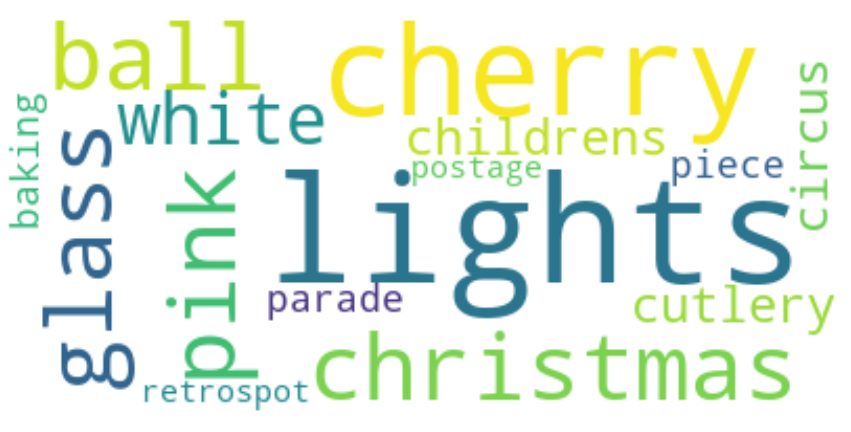

In [ ]:
# Plot wordcloud to see the words' frequency

plt.figure( figsize=(15,10))
freq_words = str(df_all['Desc_processed'].values)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(freq_words)
# Visualize the word cloud
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

With our cleansed description column we were able to create a word cloud which shows the most frequent words in the new column. The bigger and darker the word in the word cloud the more frequent it appears in the data. 

## Gensim Application

In [ ]:
# This function helps us to lowercases, tokenizes and de-accents (optional) the document

def gen_words(description):
    words = []
    for word in description:
        new = gensim.utils.simple_preprocess(str(word), deacc=True)
        words.append(new)
    return (words)

doc_words = gen_words(list(df_all['Desc_processed'].values))

In [ ]:
len(doc_words)

1061164

We implemented Gensim because it is one of the fastest libraries for training of vector embeddings. Core algorithms in Genism use battle tested and highly optimized and parallelized c routines. We've used it to process our text in the new "Description" column of the dataframe. It helps us to lower case, tokenize, and de accents the data and yields outputs that are unicode strings that do not require further processing. 

In [ ]:
# Build bigram and trigram:  which help the model to understand words better incase it can't recognize individual words.

bigram_phrases = gensim.models.Phrases(doc_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[doc_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(desc):
    return([bigram[doc] for doc in desc])

def make_trigrams(desc):
    return ([trigram[bigram[doc]] for doc in desc])

data_bigrams = make_bigrams(doc_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['christmas', 'glass', 'ball', 'lights']


In [ ]:
len(data_bigrams_trigrams)

1061164

Bigrams and trigrams are words that are used consistently together and have distinct meanings when used together. Bigram is the instance of two multi word tokens (two words that have a distinct meaning when used together). Trigram is the same as a bigram but just has an instance of three multi word tokens. These are used in case it becomes difficult to recognize individual words. Two heads are better than one or in this case two words.

In [ ]:
# In this stage words will be vectorized, change words into numerical values in a way the model can understand
# Create dictionary

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]  # Create a bow, each word in a document with its frequency

# Create tfidf model to remove words which have high frequency but are not important to form the topics
tfidf = TfidfModel(corpus, id2word=id2word)

# Remove words with very low frequency probablity
low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [ ]:
len(corpus)

1061164

Term Frequency - Inverse Docutment Frequency (TFIDF) allows us to measure the importance of terms, in this case it will be from our newly processed description column. It also helps us filter some words that may slip through because of their high frequency but in the end are not important to form our topics. 


TF - measures the frequency of a word in a document

DF - measures the importance of documents in a whole set of the corpus.Or the number of documents in which the word is present.

IDF - The inverse of DF

## Topic Modeling

Topic Modelling is a process of unsupervised learning to extract the main topics (represented as a set of words) that occur in a collection of documents.

### Build The Latent Dirichlet Allocation (LDA)  Model

LDA is used to classify text in a document to a particular topic.
In the first model we used 10 number of topics to see how the model performs.

In [ ]:
lda_model_1 = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

### Visualize The Model Performance

In [ ]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_1, corpus, dictionary=lda_model_1.id2word, mds='mmds')
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.016744  0.077298       1        1  13.726071
2      0.050753 -0.430845       2        1  12.366403
8     -0.375708 -0.140234       3        1  11.047601
0     -0.239423  0.402217       4        1  10.423262
9      0.352970 -0.335140       5        1  10.396931
6      0.416357 -0.043889       6        1  10.143509
1      0.100030  0.465801       7        1   8.368753
7     -0.262022 -0.409162       8        1   8.257473
5     -0.461495  0.142668       9        1   7.721299
4      0.401795  0.271286      10        1   7.548697, topic_info=           Term          Freq         Total Category  logprob  loglift
145         red  94078.000000  94078.000000  Default  30.0000  30.0000
127     vintage  82204.000000  82204.000000  Default  29.0000  29.0000
1     christmas  81963.000000  81963.000000  Default  28.0000  28.0000
134         bag  81229.000000  81229.000000  Default  27.0000  27.0000
157   retrospot  61085.000000  61085.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1805     marker   3367.375655   3368.285061  Topic10  -4.5243   2.5835
605      pencil   3345.834809   3346.744243  Topic10  -4.5307   2.5835
291    diamante   3259.566427   3260.475907  Topic10  -4.5569   2.5835
524       magic   3109.063978   3109.973405  Topic10  -4.6041   2.5835
318      hanger   2955.449430   2956.358849  Topic10  -4.6548   2.5835

[332 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
381       1  0.999638   airline
1361      7  0.999926     alarm
310      10  0.999940  alphabet
500       7  0.999669     angel
674       2  0.999622   animals
...     ...       ...       ...
252       2  0.999967  woodland
165       1  0.999913      wrap
93        3  0.999902    wreath
196       1  0.999914    yellow
119       1  0.999932      zinc

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 9, 1, 10, 7, 2, 8, 6, 5])

In [ ]:
# Save the Model
lda_model_1.save('/content/drive/Shareddrives/Capstone606/retail_10_topic_lda.model')

From the above graph we can see that the model is able to group 10 seperate topics perfectly. To double down we are going to evaluate the model with performance metrics. We used Coherence and Perplexity evaluating metrics

The function below helps to get the optimal number of topics with highest coherence value. We chose to compute up to 50 topics and the highest coherence value will be chosen. We chose 50 because we wanted to test the computation, we can always increase but after a certain number of topics the coherence and perplexity will not better any further.

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
 
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

[Code's Source](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#9createbigramandtrigrammodels)

In [ ]:
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_bigrams_trigrams, start=2, limit=50, step=1)


In [ ]:
# Plot the result 

# plt.figure(figsize=(10,6))
# limit=50; start=2; step=1;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()# Print the coherence scores

The above graph shows the number of topics with their coresponding coherence scores. 16 topics looks optimal in this model. Below we can see the exact number of topics with coherence values.The computation took more than 2 and half hours.

In [ ]:
# Print the coherence scores
# for m, cv in zip(x, coherence_values):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

The result shows that 16 topics has the highest coherence value 0.6236. We created another model with 16 topics.

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=16, # the number of topics with highest coherence score
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
# Save the Model
lda_model.save('/content/drive/Shareddrives/Capstone606/retail_16_topic_lda.model')

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.246*"pink" + 0.120*"paper" + 0.064*"wood" + 0.061*"gift" + 0.057*"chain" '
  '+ 0.051*"trinket" + 0.042*"bunting" + 0.042*"pot" + 0.028*"game" + '
  '0.028*"napkins"'),
 (1,
  '0.214*"vintage" + 0.148*"design" + 0.147*"bag" + 0.071*"lunch" + '
  '0.063*"spaceboy" + 0.042*"mug" + 0.035*"wicker" + 0.030*"cards" + '
  '0.028*"notebook" + 0.019*"apples"'),
 (2,
  '0.119*"jumbo" + 0.094*"bag" + 0.081*"glass" + 0.070*"paisley" + '
  '0.058*"lights" + 0.057*"silver" + 0.048*"ribbons" + 0.047*"antique" + '
  '0.041*"babushka" + 0.029*"skulls"'),
 (3,
  '0.127*"metal" + 0.098*"sign" + 0.085*"kit" + 0.072*"hand" + 0.068*"warmer" '
  '+ 0.063*"dolly" + 0.025*"hook" + 0.020*"coffee" + 0.019*"yellow" + '
  '0.014*"scales"'),
 (4,
  '0.340*"red" + 0.144*"white" + 0.097*"mini" + 0.082*"cases" + 0.046*"cup" + '
  '0.039*"charlotte" + 0.029*"lantern" + 0.022*"shopper" + 0.016*"spotty" + '
  '0.016*"biscuit"'),
 (5,
  '0.164*"bottle" + 0.153*"hot" + 0.144*"water" + 0.088*"love" + '
  '0.046*"c

In [ ]:
# Visualize the new model with 16 Topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word, mds='mmds')
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14    -0.477426  0.005255       1        1  9.382922
1      0.293494 -0.237980       2        1  9.120578
7      0.490414 -0.151074       3        1  7.330494
4      0.466323  0.116382       4        1  7.244567
12     0.357629  0.319585       5        1  6.645452
2      0.240243 -0.443341       6        1  6.581981
6     -0.397475 -0.328325       7        1  6.489459
3     -0.170321 -0.459115       8        1  6.269199
9     -0.143022  0.115361       9        1  6.086961
11    -0.437144  0.242242      10        1  6.085561
13     0.157163  0.044808      11        1  5.572956
0      0.022690 -0.397224      12        1  5.317528
15     0.170192  0.468428      13        1  5.008894
8     -0.031647  0.427759      14        1  4.461256
10    -0.257372  0.425349      15        1  4.286846
5     -0.283742 -0.148112      16        1  4.115347, topic_info=           Term           Freq          Total Category  logprob  loglift
145         red  101457.000000  101457.000000  Default  30.0000  30.0000
1     christmas   77205.000000   77205.000000  Default  29.0000  29.0000
127     vintage   80133.000000   80133.000000  Default  28.0000  28.0000
30        heart   76448.000000   76448.000000  Default  27.0000  27.0000
5          pink   53786.000000   53786.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
92       orange     898.689830     899.658283  Topic16  -5.2386   3.1894
2027      mould     829.651136     830.619588  Topic16  -5.3186   3.1893
337    mushroom     788.449575     789.418027  Topic16  -5.3695   3.1892
1882       bomb     777.014693     777.983145  Topic16  -5.3841   3.1892
2139        sex     714.856040     715.824492  Topic16  -5.4675   3.1891

[519 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1341     13  0.999666   acrylic
381       8  0.999518   airline
1361      3  0.999871     alarm
310      13  0.999908  alphabet
500       5  0.999764     angel
...     ...       ...       ...
165      10  0.999957      wrap
93        1  0.999744    wreath
130       6  0.999703   writing
196       8  0.999888    yellow
119       1  0.999948      zinc

[492 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 2, 8, 5, 13, 3, 7, 4, 10, 12, 14, 1, 16, 9, 11, 6])

With 16 different topics we can see the difference it had from the version that only had 10 topics. Given that 16 does give our highest Coherence value but in terms of Intertopic Distance Map, 10 topics are more even sizes overall which number would be better to use truly? (Open Question)

## Evaluate the LDA model by Perplexity and Coherence

In [ ]:
# Evaluating the LDA model with optimal topics

print('\nPerplexity with optimal topics: ', lda_model.log_perplexity(corpus,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=id2word , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score with optimal topics: ', coherence_lda)


Perplexity with optimal topics:  -6.8862708051314145

Coherence Score with optimal topics:  0.6255755058618131


In [ ]:
# Evaluation for the LDA Model with 10 topics

print('\nPerplexity with 10 topics: ', lda_model_1.log_perplexity(corpus,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_with10 = CoherenceModel(model=lda_model_1, texts=data_bigrams_trigrams, dictionary=id2word , coherence='c_v')
coherence_lda_10 = coherence_model_lda_with10.get_coherence()
print('\nCoherence Score with 10 topics: ', coherence_lda_10)


Perplexity with 10 topics:  -6.84688425071609

Coherence Score with 10 topics:  0.6338323184233358


From the evaluation metrics, we can learn that model with 10 topics has the highest coherence and a little high Perplexity score than the model with 16 topics.

# Prediction Model

The prediction model section is a contnuation of the previous LDA model. In this section we extracted the documents in each topics and predicted the sale for each cluster. As it is mentioned before, 10 is selected as optimum number for the topics in this dataset and the LDA model provided a better performance result with optimal number. The following the first line of code is loading the saved model that we trained it before.

In [ ]:
# Load the model
lda_loaded = gensim.models.ldamodel.LdaModel.load('/content/drive/Shareddrives/Capstone606/retail_10_topic_lda.model')

This code helps to pickle the prepared corpus and save to our drive which saves a lot of time to run the entire code to prepare it over and over again for different model training

In [ ]:
# Read the pickled corpus
# file_name = '/content/drive/Shareddrives/Capstone606/corpus.pkl'
# open_file = open(file_name, "rb")
# loaded_corpus = pickle.load(open_file)
# open_file.close()

This is a very important part of this section, extracting documents that belong to each topic. Unlike to the k-means,LDA place each document into each topics with respective probablity. Our main challenge is the extraction part to get the topic with maximum probablity of that individual document. 

In [ ]:
# Extract the documents from each topic

dictionary = {}
topics_all = []
lists_topics = lda_loaded[corpus[:-1]]
for doc in lists_topics:
 
  for topic,prob in doc:
  
      dictionary.update({topic:prob}) 

  topics= max(dictionary.items(), key=operator.itemgetter(1))[0]
  topics_all.append(topics)

As we see it below the lda model gave us a list of tuples which consist of probablity of a document in each topic. For simplesity we change the gensim datatype into dictionary and using operator function we can be able to find the topic with the highest probablity score.

In [ ]:
print(type(lists_topics))
print(type(lists_topics[0]))
print(type(lists_topics[0][0]))

<class 'gensim.interfaces.TransformedCorpus'>
<class 'list'>
<class 'tuple'>


In [ ]:
lists_topics[0] # The first document in the corpus has probablities of the following list in each 10 topics.

[(0, 0.04487806),
 (1, 0.03569849),
 (2, 0.19823119),
 (3, 0.0571784),
 (4, 0.030961612),
 (5, 0.31819075),
 (6, 0.04340029),
 (7, 0.03493577),
 (8, 0.19362976),
 (9, 0.042895712)]

After we got all documents with their respective topic, we put it in to dataframe

In [ ]:
lda_cl=pd.DataFrame(zip(data_bigrams_trigrams,topics_all),columns=['Description','Topic'])
lda_cl.head()

Description  Topic
0     [christmas, glass, ball, lights]      5
1               [pink, cherry, lights]      8
2              [white, cherry, lights]      8
3        [record, frame, single, size]      6
4  [strawberry, ceramic, trinket, box]      0

We added the Topic column into the orginal dataframe

In [ ]:
# Added the Topic column into the main dataframe

df_all['Topic'] = lda_cl['Topic']

In [ ]:
df_all.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Abs Quantity  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom            12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom            12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom            48   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom            24   

  Invoice Date Invoice Time   Sale                    Desc_processed  Topic  
0   2009-12-01     07:45:00   83.4     christmas glass ball  lights       5  
1   2009-12-01     07:45:00   81.0               pink cherry lights       8  
2   2009-12-01     07:45:00   81.0              white cherry lights       8  
3   2009-12-01     07:45:00  100.8        record frame  single size       6  
4   2009-12-01     07:45:00   30.0   strawberry ceramic trinket box       0

In [ ]:
df_all.shape

(1061164, 14)

The next step is, preparing the data for the prediction model and we only need the 3 columns from the dataframe date, topic and sale columns.

In [ ]:
# Prepare the data for prediction model
sale_data = df_all[['Invoice Date','Topic','Sale']].copy()



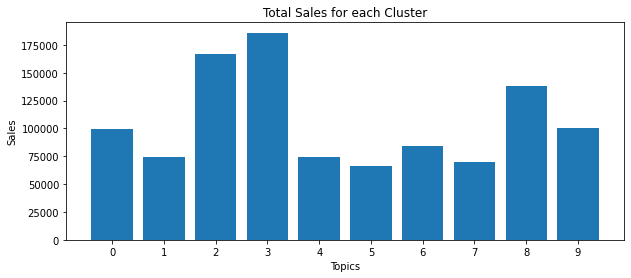

In [ ]:
# Plot total sales for each cluster

plt.figure(figsize=(10,4))


plt.bar(sale_data['Topic'].value_counts().index, sale_data['Topic'].value_counts())
plt.title("Total Sales for each Cluster")
plt.ylabel("Sales")
plt.xlabel("Topics")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

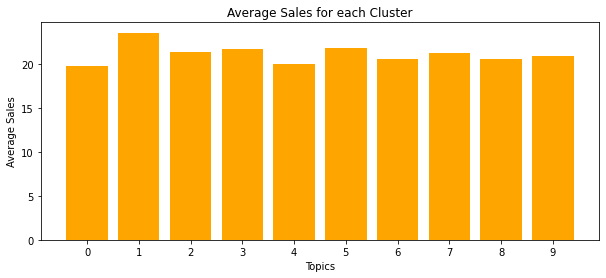

In [ ]:
# Plot the Aerage Sales for each Cluster

plt.figure(figsize=(10,4))

plt.bar(sale_data.groupby("Topic")["Sale"].mean().index, sale_data.groupby("Topic")["Sale"].mean(),color=("orange"))
plt.title("Average Sales for each Cluster")
plt.ylabel("Average Sales")
plt.xlabel("Topics")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [ ]:
# Put the date column as index for the new dataframe
sale_data['Invoice Date']=pd.to_datetime(sale_data['Invoice Date'])
sale_data.set_index('Invoice Date',inplace=True)


In [ ]:
sale_data.head()

Topic   Sale
Invoice Date              
2009-12-01        5   83.4
2009-12-01        8   81.0
2009-12-01        8   81.0
2009-12-01        6  100.8
2009-12-01        0   30.0

A good way to handle the prediction of sales data is the timeseries data analysis. Then we put each topic into its own dataframe for the analysis.

## Timeseries Data Analysis For Each Cluster

In [ ]:
# Get each Topic from the dataframe and build prediction model

Cluster_1 = sale_data['Sale'][sale_data['Topic'] == 0]
Cluster_2 = sale_data['Sale'][sale_data['Topic'] == 1]
Cluster_3 = sale_data['Sale'][sale_data['Topic'] == 2]
Cluster_4 = sale_data['Sale'][sale_data['Topic'] == 3]
Cluster_5 = sale_data['Sale'][sale_data['Topic'] == 4]
Cluster_6 = sale_data['Sale'][sale_data['Topic'] == 5]
Cluster_7 = sale_data['Sale'][sale_data['Topic'] == 6]
Cluster_8 = sale_data['Sale'][sale_data['Topic'] == 7]
Cluster_9 = sale_data['Sale'][sale_data['Topic'] == 8]
Cluster_10 = sale_data['Sale'][sale_data['Topic'] == 9]

## Cluster_1 Sales Prediction Model

The primary task in timeseries data analysis is to make sure that the interval of each entry should be the same. In our case we changed the sales transaction into daily sales using resample function. 

In [ ]:
# Get total daily sale
Cluster_1_daily_sale = Cluster_1.resample('D').sum()
Cluster_1_daily_sale.shape

(739,)

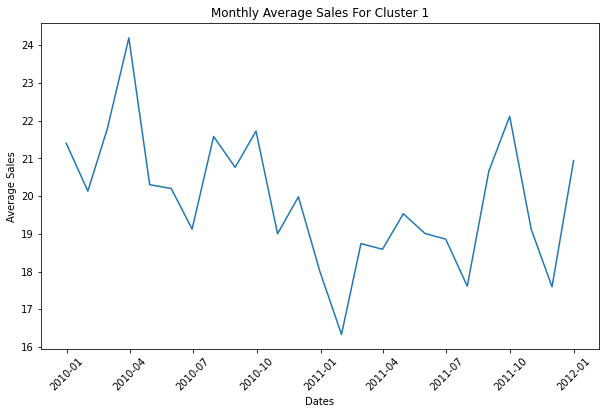

In [ ]:
# Get Average monthly sale
Cluster_1_monthly_sale = Cluster_1.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_1_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 1')
plt.show()

In [ ]:
# We found 135 0 value sales due to resampling method

Cluster_1_daily_sale[Cluster_1_daily_sale == 0].count()


135

We cleaned the data at the begining of our analysis and sales values includes only positive values. However, due to the resampling method, sales value includes 0 values since everyday didn't include a sale.

Text(0.5, 0, 'Sales')

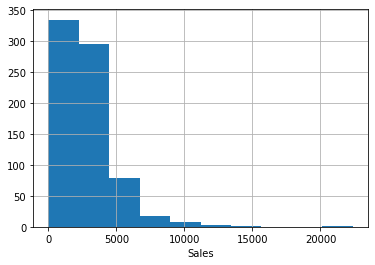

In [ ]:
Cluster_1_daily_sale.hist()
plt.xlabel('Sales')

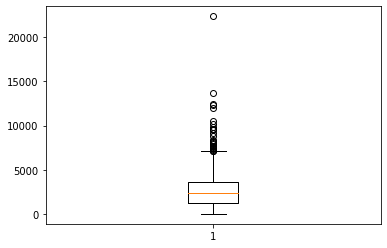

In [ ]:
plt.boxplot(Cluster_1_daily_sale);

From the above graph we can see there are outliers. To help the model perform better it is better to take care of outliers. We used Interquartile range
(IQR) method of identifying outliers to set up a bench mark  outside of Q1 and Q3 so that any value outside of this fence are considered outliers.

In [ ]:
Q1 = Cluster_1_daily_sale.quantile(0.02)
Q3 = Cluster_1_daily_sale.quantile(0.87)
IQR = Q3-Q1
print(IQR)

4659.9374


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_1_daily_sale = Cluster_1_daily_sale[~((Cluster_1_daily_sale < (Q1-1.5 * IQR)) |(Cluster_1_daily_sale > (Q3+1.5 * IQR)))]
Cluster_1_daily_sale.shape

(734,)

In [ ]:
# Scale the data

scaler = StandardScaler ()
sales_Cluster_1 = scaler.fit_transform(np.array(Cluster_1_daily_sale).reshape(-1,1))

In [ ]:
Cluster_1_daily_sale.describe()

count      734.000000
mean      2570.875711
std       1963.172358
min          0.000000
25%       1270.827500
50%       2379.625000
75%       3608.357500
max      10567.380000
Name: Sale, dtype: float64

The second main part of this section is setting up the X features and y lable. The following function help us to get a step_size of X features and y value. The fuction assigns step_size of X values and label the next value as y with a slide one until the entire data is labeled.

In [ ]:
# Before we fit the model we are going to set X features and y label

def get_x_y(data, step_size):

  X = []  
  y = []
  for i in range(len(data) - step_size):
    row = [a for a in data[i:i + step_size]]
    X.append(row)
    label = data[i + step_size]
    y.append(label)
  return np.array(X), np.array(y)

After we got the features and label, we used the above function for each cluster to get its own X and y values. Then we split the data into train and test. We also ran lazypredict function to find the best regression model for each cluster and found out that each cluster has different preference in terms of models. One model works well for one cluster but not for others. We got guidance to use stacking model to solve this problem. We used the best models that lazypredict provided us from each cluster and stack them to get the ensamble model that works well for all clusters.

### Regeression Cluster_1 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C1,y_rg_C1 = get_x_y(sales_Cluster_1, step_size)
X_rg_C1.shape, y_rg_C1.shape

X_rg_C1 = X_rg_C1.reshape(X_rg_C1.shape[0],X_rg_C1.shape[1]*1)
y_rg_C1 = y_rg_C1.reshape(y_rg_C1.shape[0])

offset = int(X_rg_C1.shape[0] * 0.9)

c1_X_train, c1_y_train = X_rg_C1 [:offset], y_rg_C1[:offset]
c1_X_test, c1_y_test = X_rg_C1[offset:], y_rg_C1[offset:]

Used Lazyapredict algorithm to get the best Regression model for Cluster_1 dataset

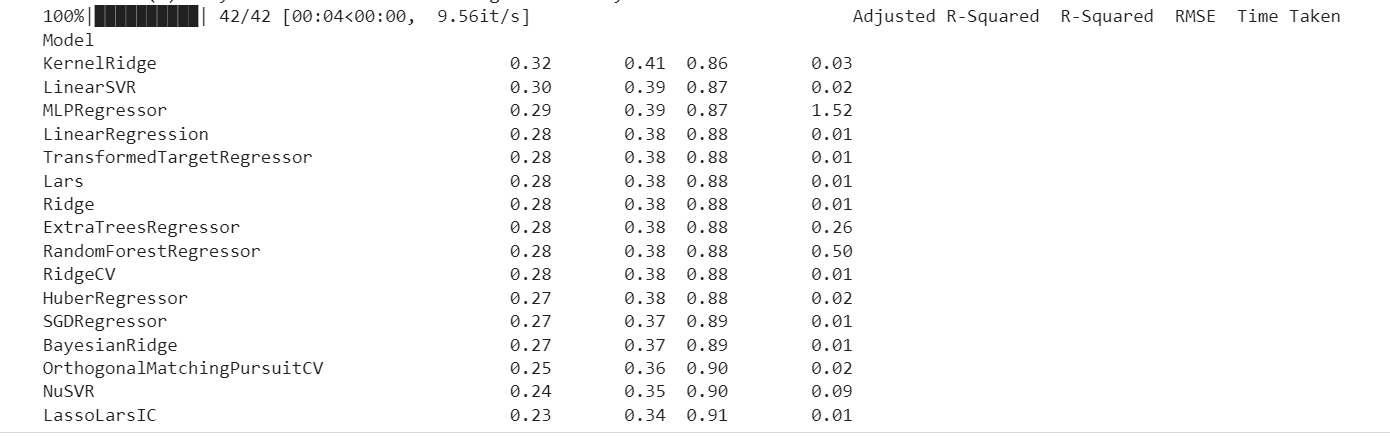

Based on the lazypredict suggestion we used LinearSVR model for the first cluster.

### LinearSVR Model

In [ ]:
# Model Fitting
regr_c1 = LinearSVR(random_state=0, C = 100, tol=1e-5)
regr_c1.fit(c1_X_train, c1_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(C=100, random_state=0, tol=1e-05)

In [ ]:
#Model Prediction using LinearSVR

predict_train_C1 = regr_c1.predict(c1_X_train)
y_prediction_c1 = regr_c1.predict(c1_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c1 = scaler.inverse_transform(y_prediction_c1.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c1_y_test.reshape(-1,1))

In [ ]:
# Creat a dataframe to plot the result

test_predict_C1 = prediction_c1.flatten()
y_test_C1 = y_test_actual.flatten()

results_C1 = pd.DataFrame(data={'Test Predictions': test_predict_C1,'Actuals': y_test_C1})
results_C1.head()

Test Predictions  Actuals
0       4034.025672  3393.77
1       3121.299168  4124.59
2       3063.727501  5189.49
3       1043.834489     0.00
4       1688.754127  1000.90

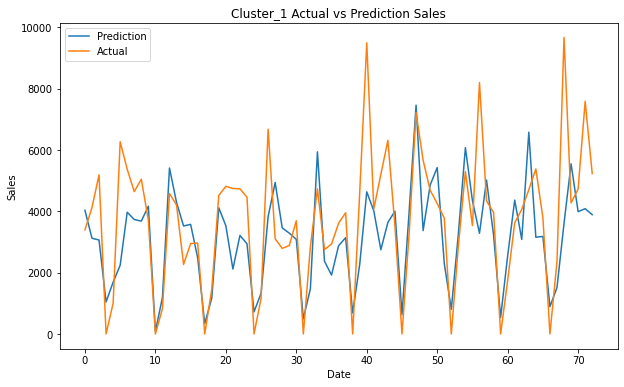

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C1['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C1['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_1 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### LinearSVR Model Performance Evaluation for Cluster 1

In [ ]:
# LinearSVR model Performance Evaluation


performance_metices = pd.DataFrame()
# Calculate RMSE for train
performance_metices['RMSE_train'] = [math.sqrt(mean_squared_error(c1_y_train, predict_train_C1))]
# Calculate RMSE for prediaction
performance_metices['RMSE_prediction'] = [math.sqrt(mean_squared_error(c1_y_test, y_prediction_c1))]
# Calculate R-Squared Score
performance_metices['R-Squared'] = [r2_score(c1_y_test, y_prediction_c1)]
performance_metices

RMSE_train  RMSE_prediction  R-Squared
0    0.862392         0.864253   0.401896

The performance metrics above show that the model is performing well. when we use the step size 30, the model was a little overfitted. Tuning the hyperparameter C in this model works well. We changed the value of C from 1 to 100, the RMSE value of test very closed to train RMSE.

We used a predominant timeseries data analysis model, the Arima Model. 

### Arima model

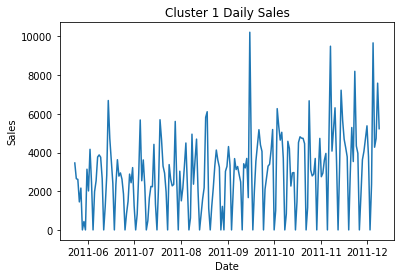

In [ ]:
plt.plot(Cluster_1_daily_sale[-200:])
plt.title('Cluster 1 Daily Sales')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

The following code helps to get the optimal values for Arima model parameters (pdq). In our case, we got the best Arima model with values of
p = 5 , d = 1, q = 2.

In [ ]:
stepwise_fit = auto_arima(sales_Cluster_1, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1962.984, Time=2.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2279.135, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2229.253, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2033.050, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2277.136, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1972.490, Time=1.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1968.185, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1972.089, Time=2.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1942.929, Time=2.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1970.603, Time=2.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1901.944, Time=3.83 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1809.057, Time=2.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1874.050, Time=2.58 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=1807.751, Time=2.41 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  734
Model:               SARIMAX(5, 1, 2)   Log Likelihood                -893.876
Date:                Tue, 26 Apr 2022   AIC                           1803.751
Time:                        16:38:01   BIC                           1840.528
Sample:                             0   HQIC                          1817.937
                                - 734                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3953      0.041      9.651      0.000       0.315       0.476
ar.L2         -0.7199      0.036    -19.872      0.000      -0.791      -0.649
ar.L3         -0.2432      0.046     -5.283      0.000      -0.333      -0.153
ar.L4         -0.3197      0.037     -8.698      0.000      -0.392      -0.248
ar.L5         -0.3417      0.038     -8.884      0.000      -0.417      -0.266
ma.L1         -1.1358      0.027    -42.396      0.000      -1.188      -1.083
ma.L2          0.8296      0.027     31.203      0.000       0.777       0.882
sigma2         0.6675      0.025     26.866      0.000       0.619       0.716
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               218.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.72
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Once we got those values, we split the data and fitted the model.

In [ ]:
# Split the data
c1_train = sales_Cluster_1[:-70]
c1_test = sales_Cluster_1[-70:]
print(c1_train.shape)
print(c1_test.shape)

(664, 1)
(70, 1)


In [ ]:
C1_model = sm.tsa.arima.ARIMA(c1_train, order=(5,1,2))
C1_model = C1_model.fit()

In [ ]:
C1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  664
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -797.748
Date:                Tue, 26 Apr 2022   AIC                           1611.495
Time:                        20:23:30   BIC                           1647.469
Sample:                             0   HQIC                          1625.436
                                - 664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4539      0.040     11.330      0.000       0.375       0.532
ar.L2         -0.7042      0.040    -17.654      0.000      -0.782      -0.626
ar.L3         -0.2558      0.048     -5.276      0.000      -0.351      -0.161
ar.L4         -0.2833      0.041     -6.947      0.000      -0.363      -0.203
ar.L5         -0.3101      0.039     -7.959      0.000      -0.387      -0.234
ma.L1         -1.1892      0.021    -55.322      0.000      -1.231      -1.147
ma.L2          0.8847      0.022     41.064      0.000       0.842       0.927
sigma2         0.6455      0.024     26.443      0.000       0.598       0.693
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               220.48
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Modelprediction

start = len(c1_train)
end=len(c1_train)+len(c1_test)-1
C1_pred=C1_model.predict(start=start, end=end, type="levels")
#print(pred)
C1_pred.index=Cluster_1_daily_sale.index[start:end+1]
print(C1_pred)

In [ ]:
# Create dataframe to plot the result

pred_c1 = scaler.inverse_transform(C1_pred)
y_actual = scaler.inverse_transform(c1_test).reshape(-1,1)
y_actual = y_actual.flatten()

res_C1 = pd.DataFrame(data={'Test Predictions': pred_c1,'Actuals': y_actual})
res_C1.tail()

Test Predictions  Actuals
65           2671.22  9669.27
66           3666.09  4274.35
67           4392.48  4727.35
68           4300.84  7585.63
69           3466.55  5232.61

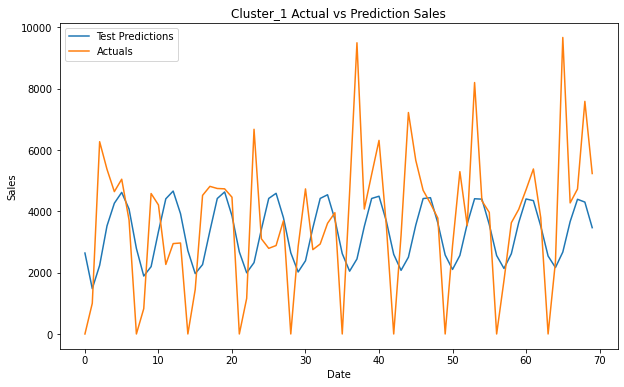

In [ ]:
plt.figure(figsize=(10,6))
res_C1['Test Predictions'].plot(legend=True)
res_C1['Actuals'].plot(legend=True)
plt.title('Cluster_1 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Arima Model Performance Ealuation

In [ ]:
### Calculate RMSE for prediaction

math.sqrt(mean_squared_error(c1_test, C1_pred))

1.1002984348147464

In [ ]:
print(r2_score(c1_test, C1_pred))

0.06362530748103168


From the graph and performance evaluation metrics we can understand that the model did not work well for this dataset. This is because the data has some seasonality and Arima cannot handle seasonality.

### Stacking Model

In stacking we have two basic components, the base model and the meta model.
The base models or level-0 models are a banch of mosels that we want to stack and fit on training the data. We will get a compiled prediction. The other one is Level-1 Model (Meta-Model): Model that learns how to best combine the predictions of the base models. In our case our meta model is Linear Regression. Base-Models are ExtraTreesRegressor, AdaBoostRegressor, RandomForestRegressor and LinearSVR.

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	   # define the base models
		level0 = list()
		level0.append(('xtr', ExtraTreesRegressor()))
		level0.append(('abr', AdaBoostRegressor()))
		level0.append(('rfr', RandomForestRegressor()))
		level0.append(('svr', LinearSVR()))
		
		# define meta learner model
		level1 = LinearRegression()
		# define the stacking ensemble
		model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
		return model

In [ ]:
# Fit the Stacking model

model_stack= get_stacking()
model_stack.fit(c1_X_train,c1_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Predict on Stacking Model
stack_predict_train_C1 = model_stack.predict(c1_X_train)
stack_y_prediction_c1 = model_stack.predict(c1_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form
stack_y_prediction_c1 = scaler.inverse_transform(stack_y_prediction_c1.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c1_y_test.reshape(-1,1))

In [ ]:
stack_predict_C1 = stack_y_prediction_c1.flatten()
y_test_C1 = y_test_actual.flatten()

stack_results_C1 = pd.DataFrame(data={'Test Predictions': stack_predict_C1,'Actuals': y_test_C1})
stack_results_C1.head()

Test Predictions  Actuals
0       3536.072434  3393.77
1       3365.718737  4124.59
2       2637.348923  5189.49
3        270.168269     0.00
4       1752.384265  1000.90

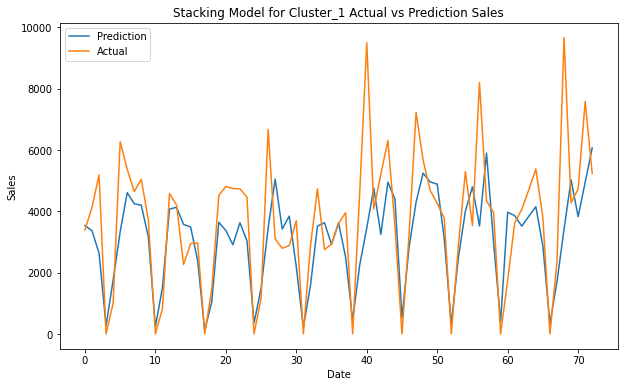

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(stack_results_C1['Test Predictions'][-100:], label = 'Prediction')
plt.plot(stack_results_C1['Actuals'][-100:], label= 'Actual')
plt.title('Stacking Model for Cluster_1 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking Model Performance Evaluation

In [ ]:
# Stacking model Performance Evaluation


perf_metices_stacking = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking['RMSE_train'] = [math.sqrt(mean_squared_error(c1_y_train, stack_predict_train_C1))]
# Calculate RMSE for prediaction
perf_metices_stacking['RMSE_prediction'] = [math.sqrt(mean_squared_error(c1_y_test, stack_y_prediction_c1))]
# Calculate R-Squared Score
perf_metices_stacking['R-Squared'] = [r2_score(c1_y_test, stack_y_prediction_c1)]
perf_metices_stacking

RMSE_train  RMSE_prediction  R-Squared
0    0.237895         0.844191   0.429341

Form the above evaluation we can see that the stacking model works well and R-Square value higher than other models

### LSTM Model for Cluster 1 Sales predicion

We also tried LSTM model to get better performance results as we know LSTM can handle timeseries data analysis very well and we hopped the seasonality problem of our data may be solved. We used step_size 30 in this model because we found it to be optimal. 

In [ ]:
step_size = 30
X_C1,y_C1 = get_x_y(sales_Cluster_1, step_size)
X_C1.shape, y_C1.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C1, y_train_C1 = X_C1[:500], y_C1[:500]
X_val_C1, y_val_C1 = X_C1[500:624], y_C1[500:624]
X_test_C1, y_test_C1 = X_C1[624:],   y_C1[624:]

X_train_C1.shape, y_train_C1.shape, X_val_C1.shape, y_val_C1.shape, X_test_C1.shape, y_test_C1.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (80, 30, 1), (80, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C1=Sequential()
model_C1.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C1.add(LSTM(50,return_sequences=True))
#model_C1.add(Dropout(0.5))
model_C1.add(LSTM(50))
model_C1.add(Dense(1))

model_C1.compile(optimizer='adam', loss='mse')
# fit the model
model_C1.fit(X_train_C1, y_train_C1, validation_data = (X_val_C1 , y_val_C1), epochs=100, verbose = 1)



Epoch 1/100
16/16 [==============================] - 9s 156ms/step - loss: 0.8524 - val_loss: 0.7761
Epoch 2/100
16/16 [==============================] - 1s 63ms/step - loss: 0.8409 - val_loss: 0.7800
Epoch 3/100
16/16 [==============================] - 1s 63ms/step - loss: 0.8184 - val_loss: 0.7900
Epoch 4/100
16/16 [==============================] - 1s 62ms/step - loss: 0.8111 - val_loss: 0.7900
Epoch 5/100
16/16 [==============================] - 1s 65ms/step - loss: 0.8103 - val_loss: 0.7829
Epoch 6/100
16/16 [==============================] - 1s 63ms/step - loss: 0.7909 - val_loss: 0.7813
Epoch 7/100
16/16 [==============================] - 1s 65ms/step - loss: 0.7818 - val_loss: 0.7656
Epoch 8/100
16/16 [==============================] - 1s 63ms/step - loss: 0.7881 - val_loss: 0.7579
Epoch 9/100
16/16 [==============================] - 1s 64ms/step - loss: 0.7571 - val_loss: 0.7557
Epoch 10/100
16/16 [==============================] - 1s 65ms/step - loss: 0.7744 - val_loss: 0.762

we used simple LSTM model with 2 hidden layers, optimizer adams, loss function mean square error and 100 epochs. The result of the model is shown as follows.

### Cluster_1 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C1 = model_C1.predict(X_train_C1)
test_predict_C1 = model_C1.predict(X_test_C1)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_C1 = scaler.inverse_transform(train_predict_C1)
test_predict_C1 = scaler.inverse_transform(test_predict_C1)
y_train_C1 = scaler.inverse_transform(y_train_C1.reshape(-1,1))
y_test_C1 = scaler.inverse_transform(y_test_C1.reshape(-1,1))

In [ ]:
# Creat the data frame to plot the result

test_predict_C1 = test_predict_C1.flatten()
y_test_C1 = y_test_C1.flatten()

test_results_C1 = pd.DataFrame(data={'Test Predictions': test_predict_C1,'Actuals': y_test_C1})
test_results_C1.head()

Test Predictions  Actuals
0       3334.762207  5181.06
1       3447.871338  4391.72
2       4633.292969  4060.53
3       2379.149414     0.00
4       1716.038940  2095.86

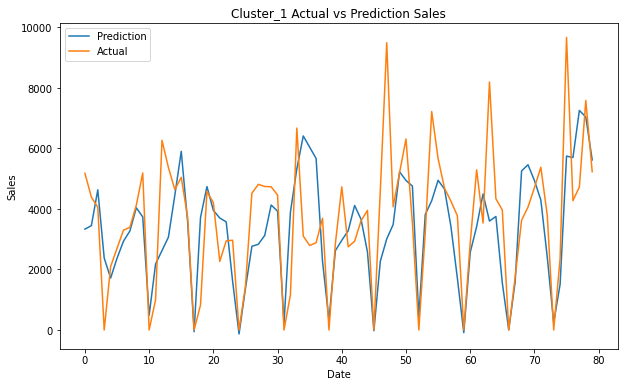

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C1['Test Predictions'][-100:], label = 'Prediction')
plt.plot(test_results_C1['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_1 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# LSTM model Performance Evaluation


perf_metices_lstm_c1 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c1['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C1, train_predict_C1))]
# Calculate RMSE for prediaction
perf_metices_lstm_c1['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C1, test_predict_C1))]
# Calculate R-Squared Score
perf_metices_lstm_c1['R-Squared'] = [r2_score(y_test_C1, test_predict_C1)]
perf_metices_lstm_c1

RMSE_train  RMSE_prediction  R-Squared
0   931.37217      1713.849939   0.366373

The model shows overfitting but has good score of R-Square value for this cluster. When we run it first we got R-Squared 45%.

### Forecasting the Sales of Cluster_1 for the next 10 days 

Once we trained and evaluated different models, the final step is forecasting the sales of each cluster for the future with unseen data. In our case our data is from the past and we want to see how our model would perform for the next 10 days starting from the last day of our test data.

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C1 = sales_Cluster_1[:600]
test_data_C1 = sales_Cluster_1[600:]

The fuction below helps our trained model to forcast the next 10 days using the previous 30 days. It sarted from the end date of our test data and iterate through the end of 10 future days and forecast the value ahead.

In [ ]:
# A function to help us to forcast the next 10 days

def forcast_10days(test_data, model, step_size, n_future):
  

  x_input = test_data[-step_size:].reshape(1,-1) # First get the last date of test data

  new_input=list(x_input)
  new_input=new_input[0].tolist()

  output=[]
 
  for i in range(n_future):
      
      if(len(new_input) > step_size):
          
          x_input=np.array(new_input[1:])
          print("{} day input {}".format(i,x_input))
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, step_size, 1))
        
          yhat = model.predict(x_input, verbose=0)
          print("{} day output {}".format(i,yhat))
          new_input.extend(yhat[0].tolist())
          new_input=new_input[1:]
          
          output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, step_size,1))
          yhat = model.predict(x_input, verbose=0)
          
          new_input.extend(yhat[0].tolist())
      
          output.extend(yhat.tolist())
          i=i+1
  return output

In [ ]:
Cluster_1_sales_forcast = forcast_10days(test_data_C1, model_C1, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

1 day input [ 0.48437534 -1.31044468  0.33214028  2.37053843  1.57643478  1.07814609
  0.8587545   0.61498777 -1.31044468  0.15556576  1.38764211  0.49125155
  2.86890358  0.90140846  0.70979189 -1.31044468 -0.41906984  0.53870204
  0.7605607   1.08646993  1.43213108  0.62153777 -1.31044468 -0.10771841
  3.61824301  0.86830679  1.0992131   2.5561555   1.35675775 -1.70066011]
1 day output [[1.301241]]
2 day input [-1.31044468  0.33214028  2.37053843  1.57643478  1.07814609  0.8587545
  0.61498777 -1.31044468  0.15556576  1.38764211  0.49125155  2.86890358
  0.90140846  0.70979189 -1.31044468 -0.41906984  0.53870204  0.7605607
  1.08646993  1.43213108  0.62153777 -1.31044468 -0.10771841  3.61824301
  0.86830679  1.0992131   2.5561555   1.35675775 -1.70066011  1.30124104]
2 day output [[2.1888561]]
3 day input [ 0.33214028  2.37053843  1.57643478  1.07814609  0.8587545   0.61498777
 -1.31044468  0.15556576  1.38764211  0.49125155  2.86890358  0.90140846
  0.70979189 -1.31044468 -0.4190698

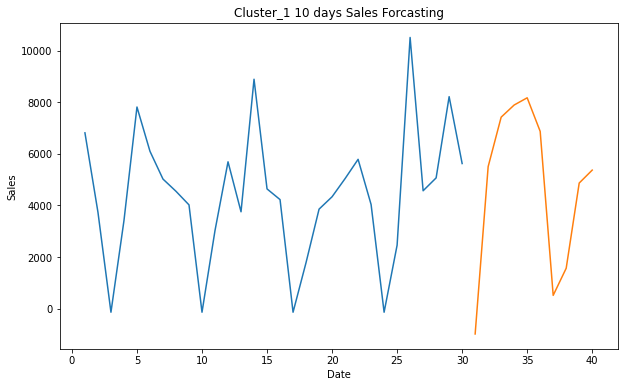

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C1[104:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_1_sales_forcast))
plt.title('Cluster_1 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

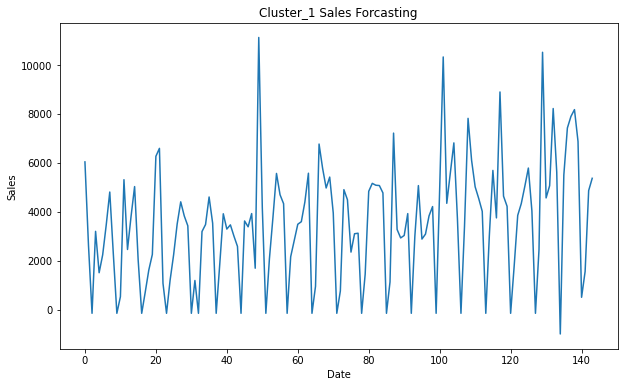

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_1=sales_Cluster_1.tolist()
new_cluster_1.extend(Cluster_1_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_1[600:]))
plt.title('Cluster_1 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c1= scaler.inverse_transform(Cluster_1_sales_forcast)
df1= pd.DataFrame(forecast_c1, columns = ['c1_forecast_sale'])
df1

The forecasting is not bad, our model can forecast well for short number of days. If we increased the number of forecasting days, the result may be different such as the graph may look a little flatter which is far from the pattern that the previous days have.

## Cluster_2 Sales Prediction Model

In [ ]:
Cluster_2_daily_sale = Cluster_2.resample('D').sum()
Cluster_2_daily_sale.shape

(739,)

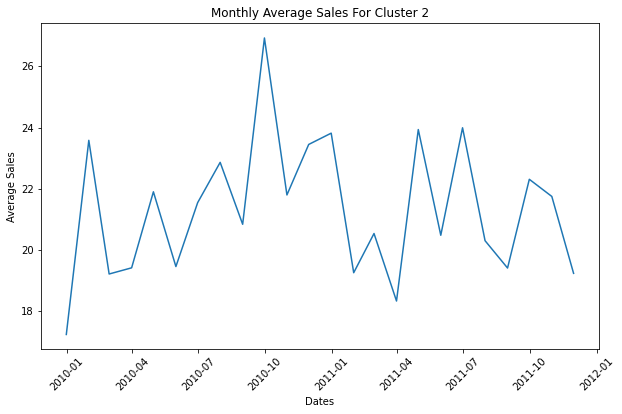

In [ ]:
# Plot Average monthly sale
Cluster_2_monthly_sale = Cluster_2.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_2_monthly_sale[:-1])

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 2')
plt.show()

In [ ]:
Cluster_2_monthly_sale

In [ ]:
Cluster_2_daily_sale[Cluster_2_daily_sale > 10000].count()

8

In [ ]:
# We have outliers in this cluster too, so it needs to take care of.

Q1 = Cluster_2_daily_sale.quantile(0.02)
Q3 = Cluster_2_daily_sale.quantile(0.87)
IQR = Q3-Q1
print(IQR)

4034.765799999999


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_2_daily_sale = Cluster_2_daily_sale[~((Cluster_2_daily_sale < (Q1-1.5 * IQR)) |(Cluster_2_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_2_daily_sale.shape

(732,)

Text(0.5, 0, 'Sales')

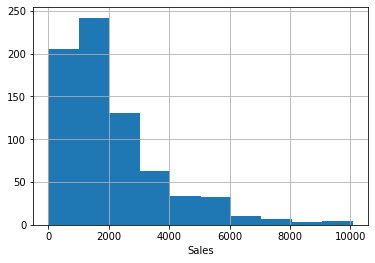

In [ ]:
Cluster_2_daily_sale.hist()
plt.xlabel('Sales')

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_2 = scaler.fit_transform(np.array(Cluster_2_daily_sale).reshape(-1,1))

In [ ]:
sales_Cluster_2

### Regeression Cluster_2 Sales Prediction Model

We used the same function that we used in cluster one to get the X and y values and split the data. We decided to apply only the Stacking and LSTM models for the rest of clusters.

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C2,y_rg_C2 = get_x_y(sales_Cluster_2, step_size)
X_rg_C2.shape, y_rg_C2.shape

X_rg_C2 = X_rg_C2.reshape(X_rg_C2.shape[0],X_rg_C2.shape[1]*1)
y_rg_C2 = y_rg_C2.reshape(y_rg_C2.shape[0])

offset = int(X_rg_C2.shape[0] * 0.9)

c2_X_train, c2_y_train = X_rg_C2 [:offset], y_rg_C2[:offset]
c2_X_test, c2_y_test = X_rg_C2[offset:], y_rg_C2[offset:]

### Stacking Model For Cluster 2

In [ ]:
# Fitting the Stacking Model

model_stack.fit(c2_X_train, c2_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Prediction On Stacking Model
predict_train_C2 = model_stack.predict(c2_X_train)
y_prediction_c2 = model_stack.predict(c2_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c2 = scaler.inverse_transform(y_prediction_c2.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c2_y_test.reshape(-1,1))

In [ ]:
# Create dataframe for ploting the results

test_predict_C2 = prediction_c2.flatten()
y_test_C2 = y_test_actual.flatten()

results_C2 = pd.DataFrame(data={'Test Predictions': test_predict_C2,'Actuals': y_test_C2})
results_C2.head()

Test Predictions  Actuals
0       2715.076909  1801.53
1       3299.156130  2967.42
2       2998.284355  2836.66
3       2844.226546  4143.10
4       2529.813702  2455.00

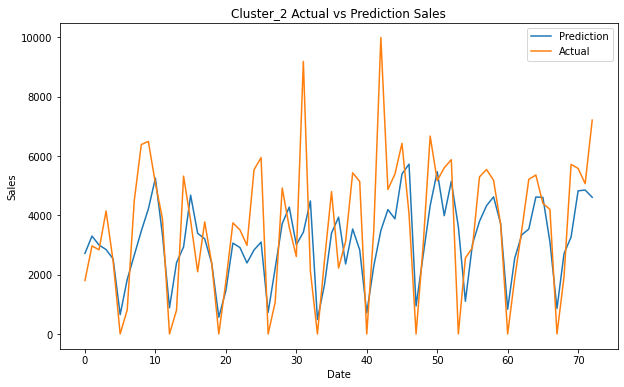

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C2['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C2['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_2 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking model Performance Evaluation for cluster 2

In [ ]:
# Stacking model Performance Evaluation


perf_metices_stacking_c2 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c2['RMSE_train'] = [math.sqrt(mean_squared_error(c2_y_train, predict_train_C2))]
# Calculate RMSE for prediaction
perf_metices_stacking_c2['RMSE_prediction'] = [math.sqrt(mean_squared_error(c2_y_test, y_prediction_c2))]
# Calculate R-Squared Score
perf_metices_stacking_c2['R-Squared'] = [r2_score(c2_y_test, y_prediction_c2)]
perf_metices_stacking_c2

RMSE_train  RMSE_prediction  R-Squared
0    0.267036         0.913217   0.469023

The performance metrics above show that the model performed well. The R-Squared score is 47% which is better than in cluster 1.

### LSTM Model for Cluster 2 Sales Presiction 

In [ ]:
step_size = 30
X_C2, y_C2 = get_x_y(sales_Cluster_2, step_size) #  X features and y label
X_C2.shape, y_C2.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C2, y_train_C2 = X_C2[:500], y_C2[:500]
X_val_C2, y_val_C2 = X_C2[500:624], y_C2[500:624]
X_test_C2, y_test_C2 = X_C2[624:],   y_C2[624:]

X_train_C2.shape, y_train_C2.shape, X_val_C2.shape, y_val_C2.shape, X_test_C2.shape, y_test_C2.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (78, 30, 1), (78, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C2=Sequential()
model_C2.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C2.add(LSTM(50,return_sequences=True))
#model_C2.add(Dropout(0.5))

model_C2.add(LSTM(50))
model_C2.add(Dense(1))

model_C2.compile(optimizer='adam', loss='mse')
# fit the model
model_C2.fit(X_train_C2, y_train_C2, validation_data=(X_val_C2, y_val_C2), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 14s 237ms/step - loss: 0.8039 - val_loss: 0.7305
Epoch 2/100
16/16 [==============================] - 1s 91ms/step - loss: 0.8040 - val_loss: 0.7222
Epoch 3/100
16/16 [==============================] - 1s 90ms/step - loss: 0.7906 - val_loss: 0.7317
Epoch 4/100
16/16 [==============================] - 2s 96ms/step - loss: 0.7890 - val_loss: 0.7234
Epoch 5/100
16/16 [==============================] - 2s 96ms/step - loss: 0.7803 - val_loss: 0.7380
Epoch 6/100
16/16 [==============================] - 1s 63ms/step - loss: 0.7759 - val_loss: 0.7269
Epoch 7/100
16/16 [==============================] - 1s 61ms/step - loss: 0.7586 - val_loss: 0.7275
Epoch 8/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7506 - val_loss: 0.7215
Epoch 9/100
16/16 [==============================] - 1s 62ms/step - loss: 0.7458 - val_loss: 0.7131
Epoch 10/100
16/16 [==============================] - 1s 62ms/step - loss: 0.7357 - val_loss: 0.72

### Cluster_2 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C2 = model_C2.predict(X_train_C2)
test_predict_C2 = model_C2.predict(X_test_C2)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_C2 = scaler.inverse_transform(train_predict_C2)
test_predict_C2 = scaler.inverse_transform(test_predict_C2)
y_train_C2 = scaler.inverse_transform(y_train_C2.reshape(-1,1))
y_test_C2 = scaler.inverse_transform(y_test_C2.reshape(-1,1))

In [ ]:
# Created the dtaframe for ploting the result

test_predict_C2 = test_predict_C2.flatten()
y_test_C2 = y_test_C2.flatten()

test_results_C2 = pd.DataFrame(data={'Test Predictions': test_predict_C2,'Actuals': y_test_C2})
test_results_C2.head()

Test Predictions      Actuals
0       4142.477539  8681.719611
1       3312.261963  5545.530698
2        983.102417  4230.465714
3      -1253.608276   252.275082
4       1182.765625  3474.085537

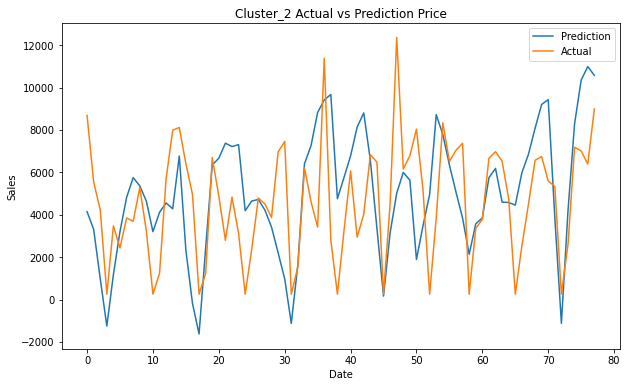

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C2['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C2['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_2 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# LSTM model Performance Evaluation


perf_metices_lstm_c2 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c2['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C2, train_predict_C2))]
# Calculate RMSE for prediaction
perf_metices_lstm_c2['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C2, test_predict_C2))]
# Calculate R-Squared Score
perf_metices_lstm_c2['R-Squared'] = [r2_score(y_test_C2, test_predict_C2)]
perf_metices_lstm_c2

RMSE_train  RMSE_prediction  R-Squared
0  1100.695913      3021.613199  -0.240528

The LSTM model for the second cluster performed bad. As we see above the graph and the performance metrics show that the model is overfitting and not doing well in this cluster's dataset.

### Forecasting the Sales of Cluster_2 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C2 = sales_Cluster_2[:600]
test_data_C2 = sales_Cluster_2[600:]

In [ ]:
test_data_C2.shape

(132, 1)

In [ ]:
Cluster_2_sales_forcast = forcast_10days(test_data_C2, model_C2, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_2_sales_forcast)

10

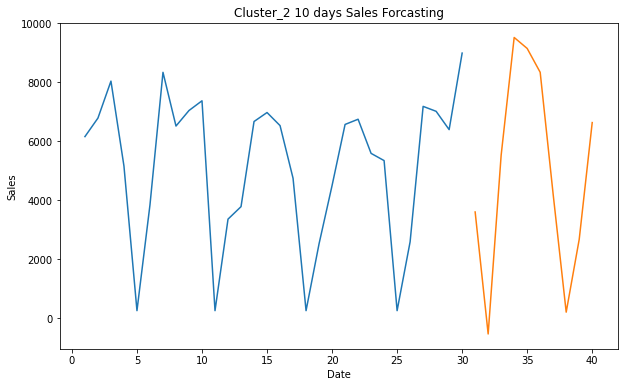

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C2[102:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_2_sales_forcast))
plt.title('Cluster_2 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

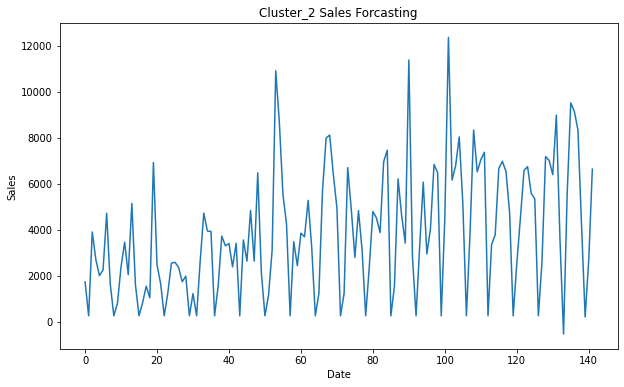

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_2=sales_Cluster_2.tolist()
new_cluster_2.extend(Cluster_2_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_2[600:]))
plt.title('Cluster_2 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c2 = scaler.inverse_transform(Cluster_2_sales_forcast)
df2= pd.DataFrame(forecast_c2, columns = ['c2_forecast_sale'])
df2

Since the model did not good in this cluster, we did not expect it will work well in forecasting. However, it is not bad and not different than the first cluster.

## Cluster_3 Sales Prediction Model

In [ ]:
Cluster_3_daily_sale = Cluster_3.resample('D').sum()
Cluster_3_daily_sale.shape

(739,)

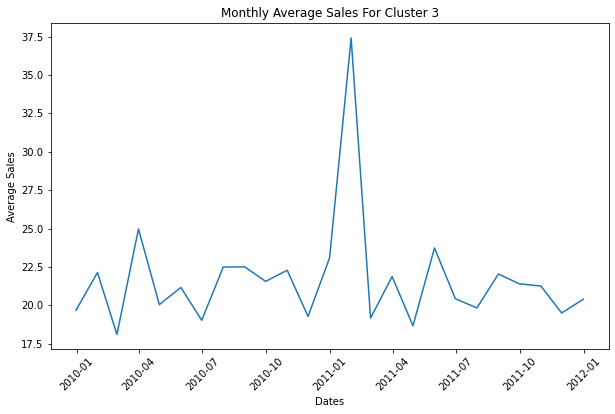

In [ ]:
# Plot Average Monthly Sale
Cluster_3_monthly_sale = Cluster_3.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_3_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 3')
plt.show()

In [ ]:
Cluster_3_daily_sale[Cluster_3_daily_sale >= 20000].count()

6

Text(0.5, 0, 'Sales')

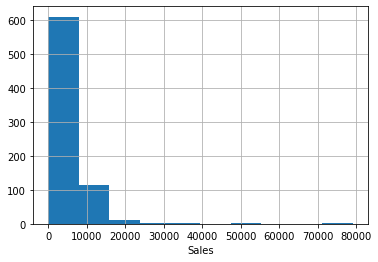

In [ ]:
Cluster_3_daily_sale.hist()
plt.xlabel('Sales')

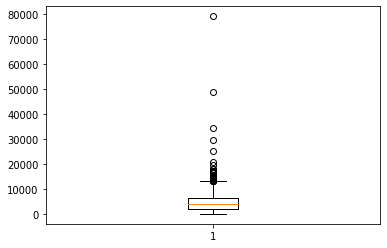

In [ ]:
plt.boxplot(Cluster_3_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of outliers. 

In [ ]:
Q1 = Cluster_3_daily_sale.quantile(0.02)
Q3 = Cluster_3_daily_sale.quantile(0.85)
IQR = Q3-Q1
print(IQR)

8535.077


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_3_daily_sale = Cluster_3_daily_sale[~((Cluster_3_daily_sale < (Q1-1.5 * IQR)) |(Cluster_3_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_3_daily_sale.shape

(734,)

In [ ]:
Cluster_3_daily_sale.describe()

count      734.000000
mean      4578.752099
std       3786.219928
min          0.000000
25%       1937.272500
50%       4115.800000
75%       6344.207500
max      20961.490000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_3 = scaler.fit_transform(np.array(Cluster_3_daily_sale).reshape(-1,1))

In [ ]:
sales_Cluster_3

### Regeression Cluster_3 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C3,y_rg_C3 = get_x_y(sales_Cluster_3, step_size)
X_rg_C3.shape, y_rg_C3.shape

X_rg_C3 = X_rg_C3.reshape(X_rg_C3.shape[0],X_rg_C3.shape[1]*1)
y_rg_C3 = y_rg_C3.reshape(y_rg_C3.shape[0])

offset = int(X_rg_C3.shape[0] * 0.9)

c3_X_train, c3_y_train = X_rg_C3 [:offset], y_rg_C3[:offset]
c3_X_test, c3_y_test = X_rg_C3[offset:], y_rg_C3[offset:]

In [ ]:
# Fit the Stacking Model

model_stack.fit(c3_X_train, c3_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Prediction On Stacking Model

predict_train_C3 = model_stack.predict(c3_X_train)
y_prediction_c3 = model_stack.predict(c3_X_test)



In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c3 = scaler.inverse_transform(y_prediction_c3.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c3_y_test.reshape(-1,1))

In [ ]:
y_test_actual.shape

(73, 1)

In [ ]:
# Create dataframe for ploting the result
test_predict_C3 = prediction_c3.flatten()
y_test_C3 = y_test_actual.flatten()

results_C3 = pd.DataFrame(data={'Test Predictions': test_predict_C3,'Actuals': y_test_C3})
results_C3.head()

Test Predictions  Actuals
0       8274.924142  7018.88
1       7519.249367  7336.46
2       9553.346662  9945.96
3       4701.059892  7413.09
4       1347.995044     0.00

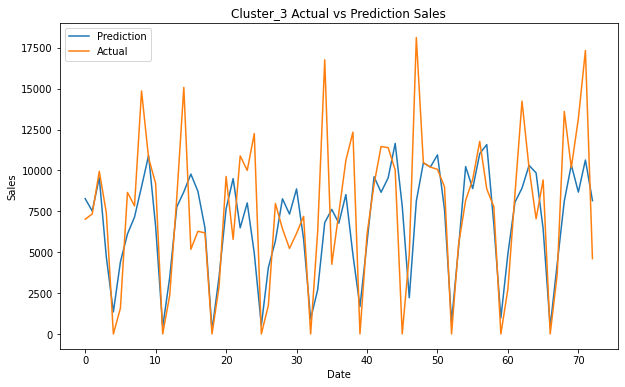

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C3['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C3['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_3 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Model Performance Evaluation on Stacking Model For Cluster 3

In [ ]:
# Stacking model Performance Evaluation


perf_metices_stacking_c3 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c3['RMSE_train'] = [math.sqrt(mean_squared_error(c3_y_train, predict_train_C3))]
# Calculate RMSE for prediaction
perf_metices_stacking_c3['RMSE_prediction'] = [math.sqrt(mean_squared_error(c3_y_test, y_prediction_c3))]
# Calculate R-Squared Score
perf_metices_stacking_c3['R-Squared'] = [r2_score(c3_y_test, y_prediction_c3)]
perf_metices_stacking_c3

RMSE_train  RMSE_prediction  R-Squared
0    0.221632         0.878455   0.462325

The performance metrics above show that the model works well with R-squared score 46% which is almost equal to cluster 2.

### LSTM Model for Cluster 3 Sales predicion

In [ ]:
step_size = 30
X_C3, y_C3 = get_x_y(sales_Cluster_3, step_size)
X_C3.shape, y_C3.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C3, y_train_C3 = X_C3[:500], y_C3[:500]
X_val_C3, y_val_C3 = X_C3[500:624], y_C3[500:624]
X_test_C3, y_test_C3 = X_C3[624:],   y_C3[624:]

X_train_C3.shape, y_train_C3.shape, X_val_C3.shape, y_val_C3.shape, X_test_C3.shape, y_test_C3.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (80, 30, 1), (80, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C3=Sequential()
model_C3.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C3.add(LSTM(50,return_sequences=True))
model_C3.add(LSTM(50))
model_C3.add(Dense(1))

model_C3.compile(optimizer='adam', loss='mse')
# fit the model
model_C3.fit(X_train_C3, y_train_C3, validation_data = (X_val_C3, y_val_C3), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 13s 527ms/step - loss: 0.7967 - val_loss: 0.9337
Epoch 2/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7473 - val_loss: 0.9384
Epoch 3/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7361 - val_loss: 0.9528
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7392 - val_loss: 0.9446
Epoch 5/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7155 - val_loss: 0.9653
Epoch 6/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7180 - val_loss: 0.9489
Epoch 7/100
16/16 [==============================] - 1s 61ms/step - loss: 0.7131 - val_loss: 0.9443
Epoch 8/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7168 - val_loss: 0.9378
Epoch 9/100
16/16 [==============================] - 1s 62ms/step - loss: 0.7103 - val_loss: 0.9320
Epoch 10/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7016 - val_loss: 0.92

### Cluster_3 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C3 = model_C3.predict(X_train_C3)
test_predict_C3 = model_C3.predict(X_test_C3)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_C3=scaler.inverse_transform(train_predict_C3)
test_predict_C3=scaler.inverse_transform(test_predict_C3)
y_train_C3 = scaler.inverse_transform(y_train_C3.reshape(-1,1))
y_test_C3 = scaler.inverse_transform(y_test_C3.reshape(-1,1))

In [ ]:
# Created dtaframe for ploting the result

test_predict_C3 = test_predict_C3.flatten()
y_test_C3 = y_test_C3.flatten()

test_results_C3 = pd.DataFrame(data={'Test Predictions': test_predict_C3,'Actuals': y_test_C3})
test_results_C3.head()

Test Predictions       Actuals
0         5166378.5  1.640688e+07
1         9456161.0  1.086818e+07
2        17859862.0  1.365982e+07
3        18589224.0  9.657528e+06
4         4757253.0  1.675030e+05

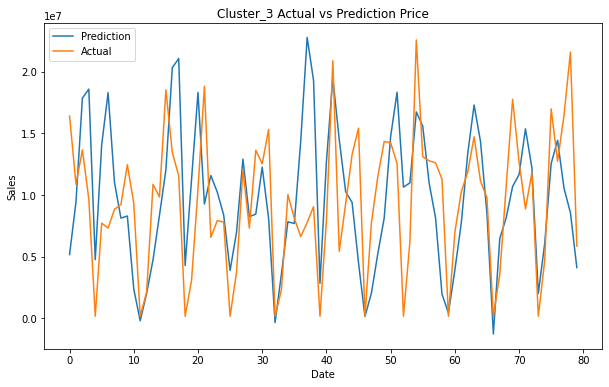

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C3['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C3['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_3 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### LSTM model Performance Evaluation For Cluster 3

In [ ]:
# LSTM model Performance Evaluation


perf_metices_lstm_c3 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c3['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C3, train_predict_C3))]
# Calculate RMSE for prediaction
perf_metices_lstm_c3['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C3, test_predict_C3))]
# Calculate R-Squared Score
perf_metices_lstm_c3['R-Squared'] = [r2_score(y_test_C3, test_predict_C3)]
perf_metices_lstm_c3

RMSE_train  RMSE_prediction  R-Squared
0  1.810306e+06     5.619255e+06  -0.029984

The LSTM model in this cluster also did not perform well. It is overfitting.

### Forecasting the Sales of Cluster_3 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C3 = sales_Cluster_3[:600]
test_data_C3 = sales_Cluster_3[600:]

In [ ]:
Cluster_3_sales_forcast = forcast_10days(test_data_C3, model_C3, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_3_sales_forcast)

10

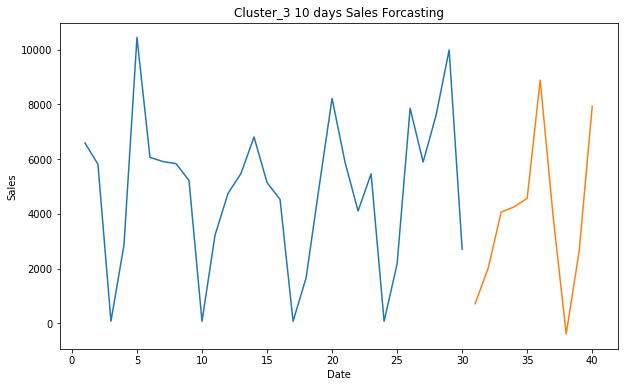

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C3[104:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_3_sales_forcast))
plt.title('Cluster_3 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

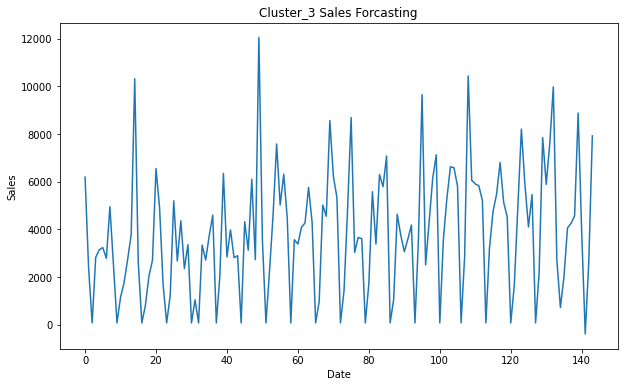

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_3=sales_Cluster_3.tolist()
new_cluster_3.extend(Cluster_3_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_3[600:]))
plt.title('Cluster_3 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c3= scaler.inverse_transform(Cluster_3_sales_forcast)
df3= pd.DataFrame(forecast_c3, columns = ['c3_forecast_sale'])
df3

The forecasting is not bad. At the beginning it forecasted poorly but got better after a while.

## Cluster_4 Sales Prediction Model

In [ ]:
Cluster_4_daily_sale = Cluster_4.resample('D').sum()
Cluster_4_daily_sale.shape

(739,)

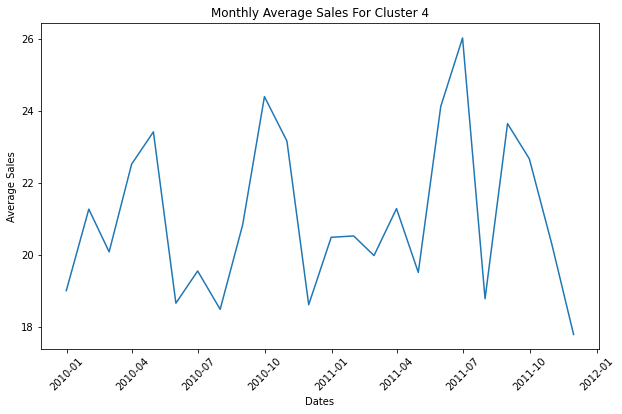

In [ ]:
# Plot Average Monthly Sale
Cluster_4_monthly_sale = Cluster_4.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_4_monthly_sale[:-1])

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 4')
plt.show()

In [ ]:
Cluster_4_daily_sale.describe()

count       739.000000
mean       5479.335344
std        7831.276079
min           0.000000
25%        2444.735000
50%        4477.890000
75%        7143.895000
max      174120.670000
Name: Sale, dtype: float64

In [ ]:
Cluster_4_daily_sale[Cluster_4_daily_sale > 25000].count()

5

Text(0.5, 0, 'Sales')

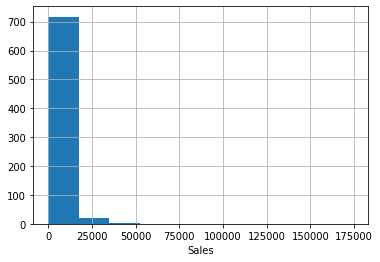

In [ ]:
Cluster_4_daily_sale.hist()
plt.xlabel('Sales')

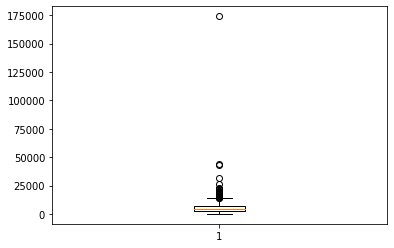

In [ ]:
plt.boxplot(Cluster_4_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of outliers. 

In [ ]:
Q1 = Cluster_4_daily_sale.quantile(0.02)
Q3 = Cluster_4_daily_sale.quantile(0.90)
IQR = Q3-Q1
print(IQR)

10632.848


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_4_daily_sale = Cluster_4_daily_sale[~((Cluster_4_daily_sale < (Q1-1.5 * IQR)) |(Cluster_4_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_4_daily_sale.shape

(735,)

In [ ]:
Cluster_4_daily_sale.describe()

count      735.000000
mean      5111.015033
std       4233.804745
min          0.000000
25%       2416.390000
50%       4469.450000
75%       7112.035000
max      26077.070000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_4= scaler.fit_transform(np.array(Cluster_4_daily_sale).reshape(-1,1))

In [ ]:
sales_Cluster_4

### Regeression Cluster_4 Sales Prediction Model

In [ ]:
### splitting the dataset into training and testing part.

step_size = 10
X_rg_C4,y_rg_C4 = get_x_y(sales_Cluster_4, step_size)
X_rg_C4.shape, y_rg_C4.shape

X_rg_C4 = X_rg_C4.reshape(X_rg_C4.shape[0],X_rg_C4.shape[1]*1)
y_rg_C4 = y_rg_C4.reshape(y_rg_C4.shape[0])

offset = int(X_rg_C4.shape[0] * 0.9)

c4_X_train, c4_y_train = X_rg_C4 [:offset], y_rg_C4[:offset]
c4_X_test, c4_y_test = X_rg_C4[offset:], y_rg_C4[offset:]

In [ ]:
# Fit Stacking  Model


model_stack.fit(c4_X_train, c4_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Prediction by Stacking Model

predict_train_C4 = model_stack.predict(c4_X_train)
y_prediction_c4 = model_stack.predict(c4_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c4 = scaler.inverse_transform(y_prediction_c4.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c4_y_test.reshape(-1,1))

In [ ]:
y_test_actual.shape

(73, 1)

In [ ]:
test_predict_C4 = prediction_c4.flatten()
y_test_C4 = y_test_actual.flatten()

results_C4 = pd.DataFrame(data={'Test Predictions': test_predict_C4,'Actuals': y_test_C4})
results_C4.head()

Test Predictions   Actuals
0      11188.921299   5722.53
1       8048.691759   7145.99
2       8800.242301  11038.60
3       7121.427346   7332.68
4        423.334771      0.00

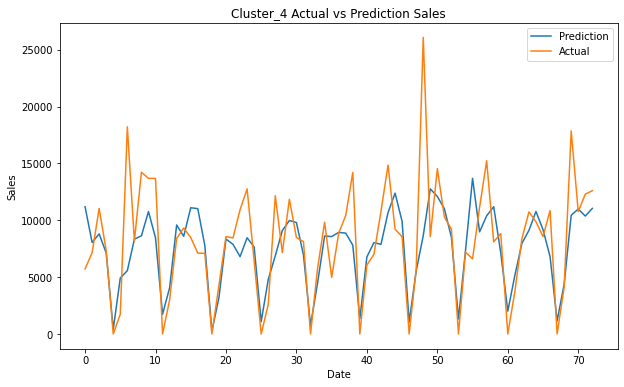

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C4['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C4['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_4 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking model Performance Evaluation For Cluster 4

In [ ]:
# Stacking model Performance Evaluation

perf_metices_stacking_c4 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c4['RMSE_train'] = [math.sqrt(mean_squared_error(c4_y_train, predict_train_C4))]
# Calculate RMSE for prediaction
perf_metices_stacking_c4['RMSE_prediction'] = [math.sqrt(mean_squared_error(c4_y_test, y_prediction_c4))]
# Calculate R-Squared Score
perf_metices_stacking_c4['R-Squared'] = [r2_score(c4_y_test, y_prediction_c4)]
perf_metices_stacking_c4


RMSE_train  RMSE_prediction  R-Squared
0    0.365803         0.873451   0.448647

The performance metrice above show that the model performed well with R-Squared 45%.

### LSTM Model for Cluster 4 Sales predicion

In [ ]:
step_size = 30
X_C4, y_C4 = get_x_y(sales_Cluster_4, step_size)
X_C4.shape, y_C4.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C4, y_train_C4 = X_C4[:500], y_C4[:500]
X_val_C4, y_val_C4 = X_C4[500:624], y_C4[500:624]
X_test_C4, y_test_C4 = X_C4[624:],   y_C4[624:]

X_train_C4.shape, y_train_C4.shape, X_val_C4.shape, y_val_C4.shape, X_test_C4.shape, y_test_C4.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (81, 30, 1), (81, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C4=Sequential()
model_C4.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C4.add(LSTM(50,return_sequences=True))
model_C4.add(LSTM(50))
model_C4.add(Dense(1))

model_C4.compile(optimizer='adam', loss='mse')
# fit the model
model_C4.fit(X_train_C4, y_train_C4, validation_data=(X_val_C4, y_val_C4), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 8s 146ms/step - loss: 0.8381 - val_loss: 0.6377
Epoch 2/100
16/16 [==============================] - 1s 59ms/step - loss: 0.8355 - val_loss: 0.6296
Epoch 3/100
16/16 [==============================] - 1s 62ms/step - loss: 0.8143 - val_loss: 0.6283
Epoch 4/100
16/16 [==============================] - 1s 61ms/step - loss: 0.8184 - val_loss: 0.6297
Epoch 5/100
16/16 [==============================] - 1s 60ms/step - loss: 0.8117 - val_loss: 0.6345
Epoch 6/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7984 - val_loss: 0.6292
Epoch 7/100
16/16 [==============================] - 1s 58ms/step - loss: 0.7754 - val_loss: 0.6251
Epoch 8/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7716 - val_loss: 0.6248
Epoch 9/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7704 - val_loss: 0.6250
Epoch 10/100
16/16 [==============================] - 1s 62ms/step - loss: 0.7494 - val_loss: 0.625

### Cluster_4 Prediction And Check Performance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C4 = model_C4.predict(X_train_C4)
test_predict_C4 = model_C4.predict(X_test_C4)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_C4 = scaler.inverse_transform(train_predict_C4)
test_predict_C4 = scaler.inverse_transform(test_predict_C4)
y_train_C4 = scaler.inverse_transform(y_train_C4.reshape(-1,1))
y_test_C4 = scaler.inverse_transform(y_test_C4.reshape(-1,1))

In [ ]:
test_predict_C4

In [ ]:
# Created Dataframe for ploting the result

test_predict_C4 = test_predict_C4.flatten()
y_test_C4 = y_test_C4.flatten()

test_results_C4 = pd.DataFrame(data={'Test Predictions': test_predict_C4,'Actuals': y_test_C4})
test_results_C4.head()

Test Predictions       Actuals
0       6164.791504   5991.274943
1       6857.882324  11431.084441
2       6533.718750   4549.780981
3       6164.355469   8047.649049
4       5460.140137   4588.848573

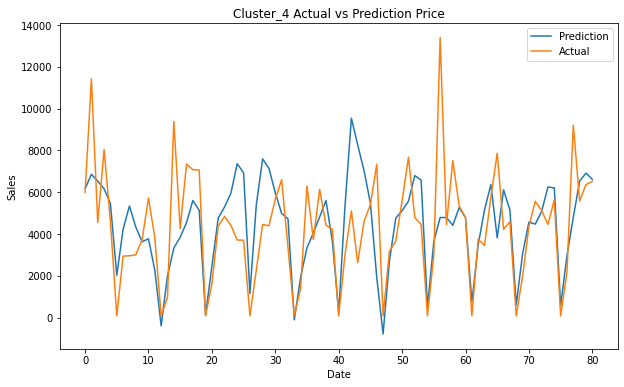

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C4['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C4['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_4 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# LSTM model Performance Evaluation


perf_metices_lstm_c4 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c4['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C4, train_predict_C4))]
# Calculate RMSE for prediaction
perf_metices_lstm_c4['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C4, test_predict_C4))]
# Calculate R-Squared Score
perf_metices_lstm_c4['R-Squared'] = [r2_score(y_test_C4, test_predict_C4)]
perf_metices_lstm_c4

RMSE_train  RMSE_prediction  R-Squared
0  1009.575503      2268.057958   0.258019

The LSTM model in this cluster is still overfitting but works better than cluster 2 and 3.

### Forecasting the Sales of Cluster_4 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C4 = sales_Cluster_4[:600]
test_data_C4 = sales_Cluster_4[600:]

In [ ]:
test_data_C4.shape

(135, 1)

In [ ]:
Cluster_4_sales_forcast = forcast_10days(test_data_C4, model_C4, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_4_sales_forcast)

10

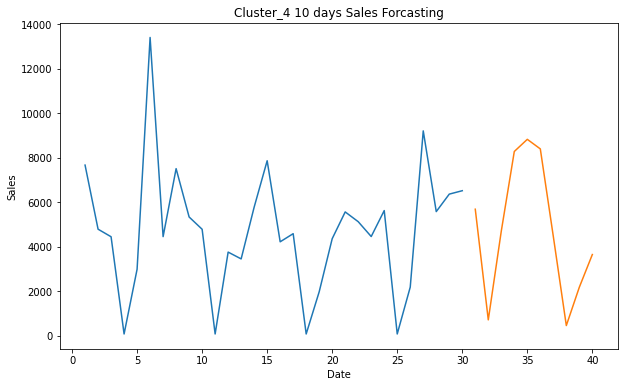

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C4[105:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_4_sales_forcast))
plt.title('Cluster_4 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

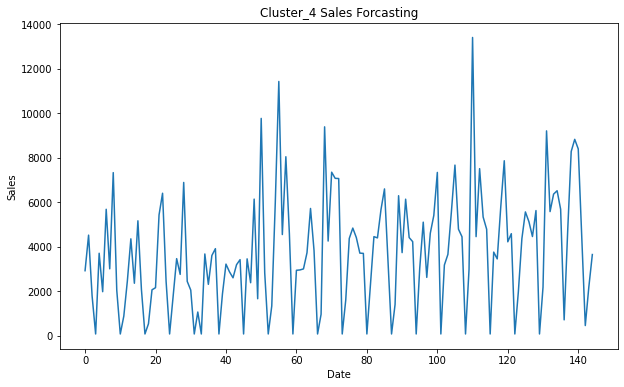

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_4=sales_Cluster_4.tolist()
new_cluster_4.extend(Cluster_4_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_4[600:]))
plt.title('Cluster_4 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c4= scaler.inverse_transform(Cluster_4_sales_forcast)
df4= pd.DataFrame(forecast_c4, columns = ['c4_forecast_sale'])
df4

As expected the forecasting in this cluster is better than the previous two clusters' forecasting

## Cluster_5 Sales Prediction Model

In [ ]:
Cluster_5_daily_sale = Cluster_5.resample('D').sum()
Cluster_5_daily_sale.shape

(739,)

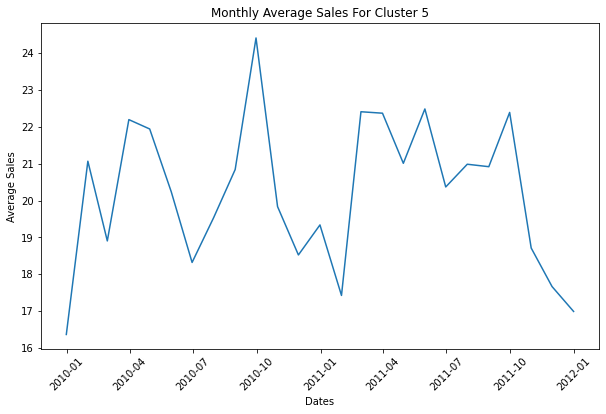

In [ ]:
# Plot Average Monthly Sale
Cluster_5_monthly_sale = Cluster_5.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_5_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 5')
plt.show()

In [ ]:
Cluster_5_daily_sale.describe()

count      739.000000
mean      2018.707620
std       1826.100441
min          0.000000
25%        851.640000
50%       1734.340000
75%       2771.235000
max      15874.060000
Name: Sale, dtype: float64

Text(0.5, 0, 'Sales')

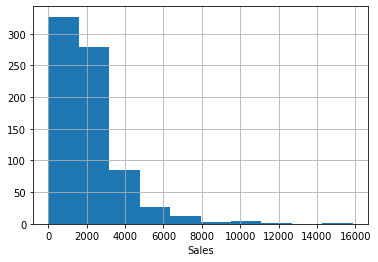

In [ ]:
Cluster_5_daily_sale.hist()
plt.xlabel('Sales')

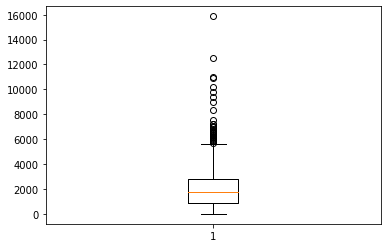

In [ ]:
plt.boxplot(Cluster_5_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of outliers. 

In [ ]:
Q1 = Cluster_5_daily_sale.quantile(0.02)
Q3 = Cluster_5_daily_sale.quantile(0.95)
IQR = Q3-Q1
print(IQR)

5271.146000000002


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_5_daily_sale = Cluster_5_daily_sale[~((Cluster_5_daily_sale < (Q1-1.5 * IQR)) |(Cluster_5_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_5_daily_sale.shape

(738,)

In [ ]:
Cluster_5_daily_sale.describe()

count      738.000000
mean      1999.933430
std       1754.519455
min          0.000000
25%        850.175000
50%       1733.020000
75%       2770.365000
max      12508.900000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(-1, 1))
sales_Cluster_5= scaler.fit_transform(np.array(Cluster_5_daily_sale).reshape(-1,1))

### Regeression Cluster_5 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C5,y_rg_C5 = get_x_y(sales_Cluster_5, step_size)
X_rg_C5.shape, y_rg_C5.shape

X_rg_C5 = X_rg_C5.reshape(X_rg_C5.shape[0],X_rg_C5.shape[1]*1)
y_rg_C5 = y_rg_C5.reshape(y_rg_C5.shape[0])

offset = int(X_rg_C5.shape[0] * 0.9)

c5_X_train, c5_y_train = X_rg_C5 [:offset], y_rg_C5[:offset]
c5_X_test, c5_y_test = X_rg_C5[offset:], y_rg_C5[offset:]

In [ ]:
# Fit the Stacking Model

model_stack.fit(c5_X_train, c5_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Prediction by Stack Model

predict_train_C5 = model_stack.predict(c5_X_train)
y_prediction_c5 = model_stack.predict(c5_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c5 = scaler.inverse_transform(y_prediction_c5.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c5_y_test.reshape(-1,1))

In [ ]:
# Created dataframe for ploting the result

test_predict_C5 = prediction_c5.flatten()
y_test_C5 = y_test_actual.flatten()

results_C5 = pd.DataFrame(data={'Test Predictions': test_predict_C5,'Actuals': y_test_C5})
results_C5.head()

Test Predictions  Actuals
0       2065.178084  1974.48
1       2035.140206  2351.90
2       2772.280291  3949.07
3        393.443951     0.00
4       1299.184960   662.58

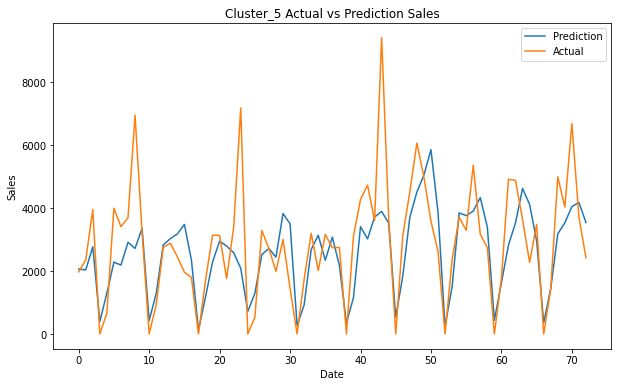

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C5['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C5['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_5 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking model Performance Evaluation For Cluster 5

In [ ]:
# Stacking model Performance Evaluation

perf_metices_stacking_c5 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c5['RMSE_train'] = [math.sqrt(mean_squared_error(c5_y_train, predict_train_C5))]
# Calculate RMSE for prediaction
perf_metices_stacking_c5['RMSE_prediction'] = [math.sqrt(mean_squared_error(c5_y_test, y_prediction_c5))]
# Calculate R-Squared Score
perf_metices_stacking_c5['R-Squared'] = [r2_score(c5_y_test, y_prediction_c5)]
perf_metices_stacking_c5

RMSE_train  RMSE_prediction  R-Squared
0    0.091669         0.225618    0.43234

The performance metrice above show that the model works not bad and R-Squared score is 43% which is not different than other clusters' score.

### LSTM Model for Cluster 5 Sales Prediction 

In [ ]:
step_size = 30
X_C5, y_C5 = get_x_y(sales_Cluster_5, step_size)
X_C5.shape, y_C5.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C5, y_train_C5 = X_C5[:500], y_C5[:500]
X_val_C5, y_val_C5 = X_C5[500:624], y_C5[500:624]
X_test_C5, y_test_C5 = X_C5[624:],   y_C5[624:]

X_train_C5.shape, y_train_C5.shape, X_val_C5.shape, y_val_C5.shape, X_test_C5.shape, y_test_C5.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (84, 30, 1), (84, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C5=Sequential()
model_C5.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C5.add(LSTM(50,return_sequences=True))
model_C5.add(LSTM(50))
model_C5.add(Dense(1))

model_C5.compile(optimizer='adam', loss='mse')
# fit the model
model_C5.fit(X_train_C5, y_train_C5, validation_data=(X_val_C5, y_val_C5), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 7s 142ms/step - loss: 0.1734 - val_loss: 0.0865
Epoch 2/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0836 - val_loss: 0.0488
Epoch 3/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0772 - val_loss: 0.0490
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.0770 - val_loss: 0.0496
Epoch 5/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0777 - val_loss: 0.0487
Epoch 6/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0766 - val_loss: 0.0500
Epoch 7/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0770 - val_loss: 0.0489
Epoch 8/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0771 - val_loss: 0.0493
Epoch 9/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0776 - val_loss: 0.0497
Epoch 10/100
16/16 [==============================] - 1s 60ms/step - loss: 0.0763 - val_loss: 0.051

### Cluster_5 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C5 = model_C5.predict(X_train_C5)
test_predict_C5 = model_C5.predict(X_test_C5)

In [ ]:
scaler.inverse_transform(train_predict_C5)

In [ ]:
# Transform the scaled Sales back to the original Sales form


train_predict_C5 = scaler.inverse_transform(train_predict_C5)
test_predict_C5 = scaler.inverse_transform(test_predict_C5)
y_train_C5 = scaler.inverse_transform(y_train_C5.reshape(-1,1))
y_test_C5 = scaler.inverse_transform(y_test_C5.reshape(-1,1))

In [ ]:
test_predict_C5 = test_predict_C5.flatten()
y_test_C5 = y_test_C5.flatten()

test_results_C5 = pd.DataFrame(data={'Test Predictions': test_predict_C5,'Actuals': y_test_C5})
test_results_C5.head()

Test Predictions      Actuals
0        849.806396   530.629093
1        846.486938   778.385496
2        965.579834   724.872796
3       1081.148438  4065.482103
4       1138.792725  1758.001888

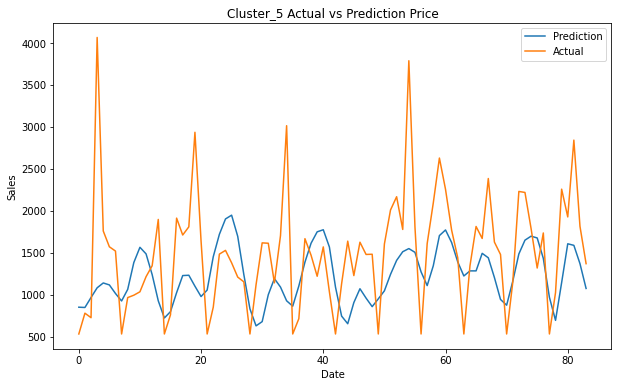

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C5['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C5['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_5 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


###  LSTM model Performance Evaluation For Cluster 5

In [ ]:
# LSTM model Performance Evaluation

perf_metices_lstm_c5 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c5['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C5, train_predict_C5))]
# Calculate RMSE for prediaction
perf_metices_lstm_c5['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C5, test_predict_C5))]
# Calculate R-Squared Score
perf_metices_lstm_c5['R-Squared'] = [r2_score(y_test_C5, test_predict_C5)]
perf_metices_lstm_c5


RMSE_train  RMSE_prediction  R-Squared
0    559.2698        700.17775  -0.002474

The RMSE values in this cluster look better than previous clusters but the R-Squared score is not good.

### Forecasting the Sales of Cluster_5 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C5 = sales_Cluster_5[:600]
test_data_C5 = sales_Cluster_5[600:]

In [ ]:
test_data_C5.shape

(138, 1)

In [ ]:
Cluster_5_sales_forcast = forcast_10days(test_data_C5, model_C5, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_5_sales_forcast)

10

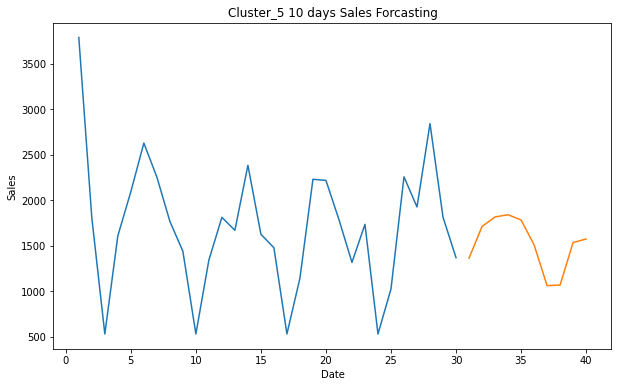

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C5[108:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_5_sales_forcast))
plt.title('Cluster_5 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

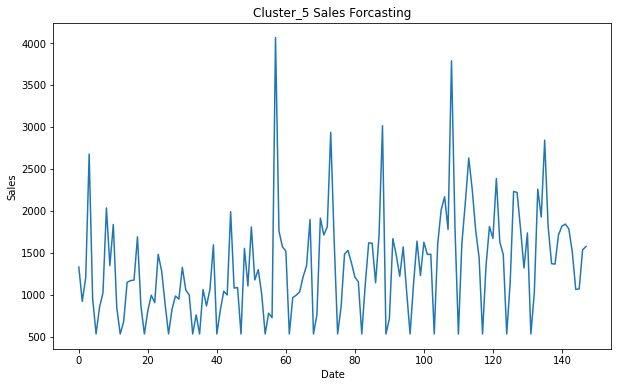

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_5=sales_Cluster_5.tolist()
new_cluster_5.extend(Cluster_5_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_5[600:]))
plt.title('Cluster_5 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c5= scaler.inverse_transform(Cluster_5_sales_forcast)
df5= pd.DataFrame(forecast_c5, columns = ['c5_forecast_sale'])

The forecasting for this cluster also not good.

## Cluster_6 Sales Prediction Model

In [ ]:
Cluster_6_daily_sale = Cluster_6.resample('D').sum()
Cluster_6_daily_sale.shape

(739,)

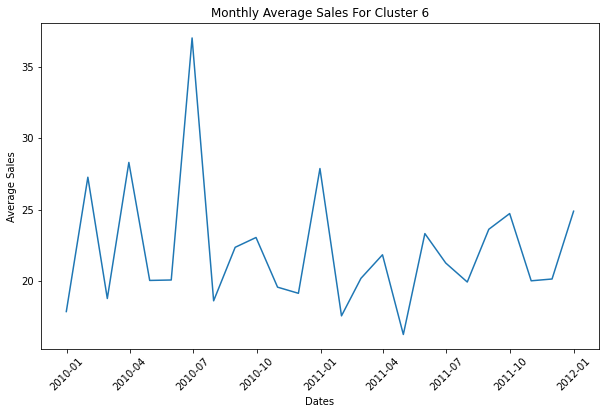

In [ ]:
# Plot Average Monthly Sale
Cluster_6_monthly_sale = Cluster_6.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_6_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 6')
plt.show()

In [ ]:
Cluster_6_daily_sale.describe()

count      739.000000
mean      1976.086307
std       3296.452505
min          0.000000
25%        553.140000
50%       1204.860000
75%       2414.370000
max      63312.720000
Name: Sale, dtype: float64

Text(0.5, 0, 'Sales')

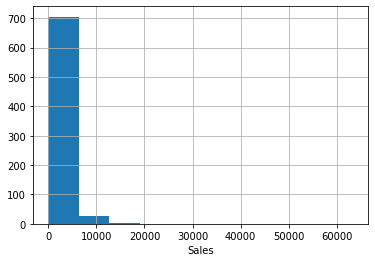

In [ ]:
Cluster_6_daily_sale.hist()
plt.xlabel('Sales')

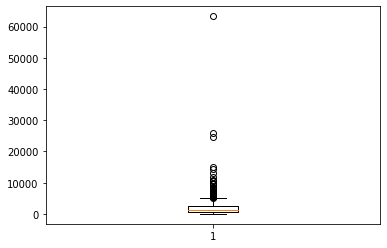

In [ ]:
plt.boxplot(Cluster_6_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of those outliers. 

In [ ]:
Q1 = Cluster_6_daily_sale.quantile(0.02)
Q3 = Cluster_6_daily_sale.quantile(0.95)
IQR = Q3-Q1
print(IQR)

6141.339900000001


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_6_daily_sale = Cluster_6_daily_sale[~((Cluster_6_daily_sale < (Q1-1.5 * IQR)) |(Cluster_6_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_6_daily_sale.shape

(736,)

In [ ]:
Cluster_6_daily_sale.describe()

count      736.000000
mean      1829.707039
std       2074.932587
min          0.000000
25%        550.922500
50%       1202.205000
75%       2372.410000
max      14914.330000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_6= scaler.fit_transform(np.array(Cluster_6_daily_sale).reshape(-1,1))

### Regeression Cluster_6 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C6,y_rg_C6 = get_x_y(sales_Cluster_6, step_size)
X_rg_C6.shape, y_rg_C6.shape

X_rg_C6 = X_rg_C6.reshape(X_rg_C6.shape[0],X_rg_C6.shape[1]*1)
y_rg_C6 = y_rg_C6.reshape(y_rg_C6.shape[0])

offset = int(X_rg_C6.shape[0] * 0.9)

c6_X_train, c6_y_train = X_rg_C6 [:offset], y_rg_C6[:offset]
c6_X_test, c6_y_test = X_rg_C6[offset:], y_rg_C6[offset:]

In [ ]:
# Fit the Stacking Model

model_stack.fit(c6_X_train, c6_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Prediction by Stacking Model

predict_train_C6 = model_stack.predict(c6_X_train)
y_prediction_c6 = model_stack.predict(c6_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c6 = scaler.inverse_transform(y_prediction_c6.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c6_y_test.reshape(-1,1))

In [ ]:
# Created Dataframe for ploting the result

test_predict_C6= prediction_c6.flatten()
y_test_C6 = y_test_actual.flatten()

results_C6 = pd.DataFrame(data={'Test Predictions': test_predict_C6,'Actuals': y_test_C6})
results_C6.head()

Test Predictions  Actuals
0       3229.111527  2371.62
1       2893.980883  5426.37
2       3774.500880  2580.78
3       2281.219340  2865.54
4        358.168898     0.00

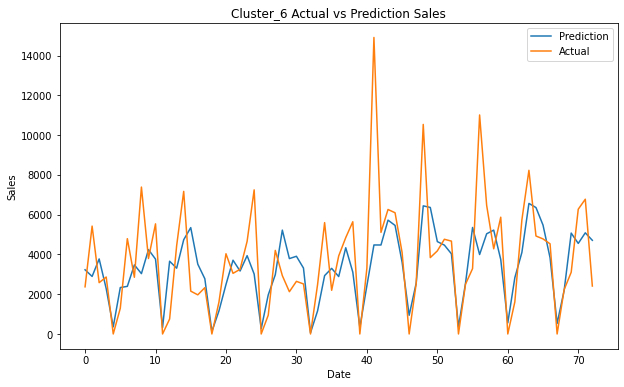

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C6['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C6['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_6 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking Model Performance Evaluation For Cluster 6

In [ ]:
# Stacking model Performance Evaluation

perf_metices_stacking_c6 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c6['RMSE_train'] = [math.sqrt(mean_squared_error(c6_y_train, predict_train_C6))]
# Calculate RMSE for prediaction
perf_metices_stacking_c6['RMSE_prediction'] = [math.sqrt(mean_squared_error(c6_y_test, y_prediction_c6))]
# Calculate R-Squared Score
perf_metices_stacking_c6['R-Squared'] = [r2_score(c6_y_test, y_prediction_c6)]
perf_metices_stacking_c6


RMSE_train  RMSE_prediction  R-Squared
0    0.146611         1.043695   0.381044

The performance metrics above show that the model performed less than it worked on the pevious clusters. The R-Squared is 38%.

### LSTM Model For Cluster 6 Sales Prediction

In [ ]:
step_size = 30
X_C6, y_C6 = get_x_y(sales_Cluster_6, step_size)
X_C6.shape, y_C6.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C6, y_train_C6 = X_C6[:500], y_C6[:500]
X_val_C6, y_val_C6 = X_C6[500:624], y_C6[500:624]
X_test_C6, y_test_C6 = X_C6[624:],   y_C6[624:]

X_train_C6.shape, y_train_C6.shape, X_val_C6.shape, y_val_C6.shape, X_test_C6.shape, y_test_C6.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (82, 30, 1), (82, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C6=Sequential()
model_C6.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C6.add(LSTM(50,return_sequences=True))
model_C6.add(LSTM(50))
model_C6.add(Dense(1))

model_C6.compile(optimizer='adam', loss='mse')
# fit the model
model_C6.fit(X_train_C6, y_train_C6, validation_data=(X_val_C6, y_val_C6), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 8s 152ms/step - loss: 0.6585 - val_loss: 0.3651
Epoch 2/100
16/16 [==============================] - 1s 61ms/step - loss: 0.6157 - val_loss: 0.3644
Epoch 3/100
16/16 [==============================] - 1s 60ms/step - loss: 0.5779 - val_loss: 0.3640
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.5883 - val_loss: 0.3687
Epoch 5/100
16/16 [==============================] - 1s 58ms/step - loss: 0.5816 - val_loss: 0.3670
Epoch 6/100
16/16 [==============================] - 1s 61ms/step - loss: 0.5607 - val_loss: 0.3616
Epoch 7/100
16/16 [==============================] - 1s 61ms/step - loss: 0.5483 - val_loss: 0.3597
Epoch 8/100
16/16 [==============================] - 1s 61ms/step - loss: 0.5301 - val_loss: 0.3590
Epoch 9/100
16/16 [==============================] - 1s 60ms/step - loss: 0.5336 - val_loss: 0.3590
Epoch 10/100
16/16 [==============================] - 1s 62ms/step - loss: 0.5333 - val_loss: 0.366

### Cluster_6 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C6 = model_C6.predict(X_train_C6)
test_predict_C6 = model_C6.predict(X_test_C6)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_C6 = scaler.inverse_transform(train_predict_C6)
test_predict_C6 = scaler.inverse_transform(test_predict_C6)
y_train_C6 = scaler.inverse_transform(y_train_C6.reshape(-1,1))
y_test_C6 = scaler.inverse_transform(y_test_C6.reshape(-1,1))

In [ ]:
test_predict_C6 = test_predict_C6.flatten()
y_test_C6 = y_test_C6.flatten()

test_results_C6 = pd.DataFrame(data={'Test Predictions': test_predict_C6,'Actuals': y_test_C6})
test_results_C6.head()

Test Predictions       Actuals
0       2347.114258   1632.939066
1       4036.009033   5994.018134
2       3902.750732  15911.534163
3       3212.827637   3708.765899
4       2654.793945   4657.677170

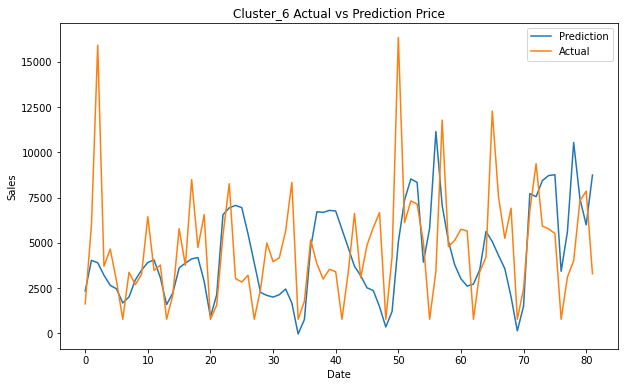

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C6['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C6['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_6 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:

# LSTM model Performance Evaluation

perf_metices_lstm_c6 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c6['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C6, train_predict_C6))]
# Calculate RMSE for prediaction
perf_metices_lstm_c6['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C6, test_predict_C6))]
# Calculate R-Squared Score
perf_metices_lstm_c6['R-Squared'] = [r2_score(y_test_C6, test_predict_C6)]
perf_metices_lstm_c6


RMSE_train  RMSE_prediction  R-Squared
0  956.793737      3370.761244  -0.221278

The LSTM model overfitted for this cluster.

### Forecasting the Sales of Cluster_6 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C6 = sales_Cluster_6[:600]
test_data_C6 = sales_Cluster_6[600:]

In [ ]:
test_data_C6.shape

(136, 1)

In [ ]:
Cluster_6_sales_forcast = forcast_10days(test_data_C6, model_C6, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_6_sales_forcast)

10

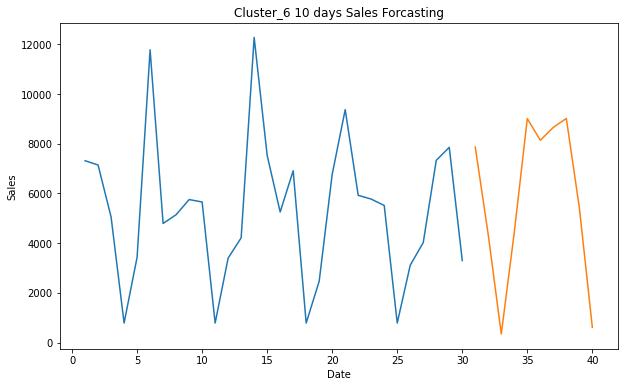

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C6[106:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_6_sales_forcast))
plt.title('Cluster_6 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

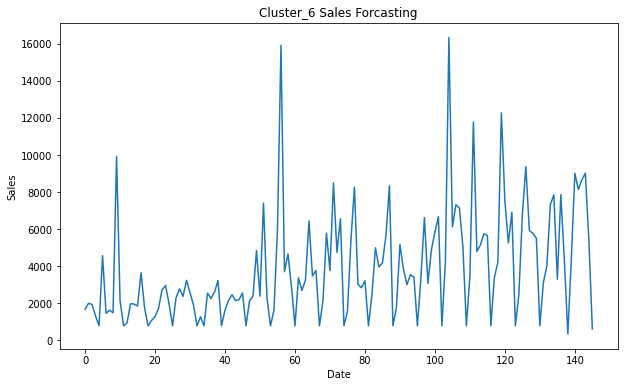

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_6=sales_Cluster_6.tolist()
new_cluster_6.extend(Cluster_6_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_6[600:]))
plt.title('Cluster_6 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c6= scaler.inverse_transform(Cluster_6_sales_forcast)
df6 = pd.DataFrame(forecast_c6, columns = ['c6_forecast_sale'])

The forecating still is not that bad

## Cluster_7 Sales Prediction Model

In [ ]:
Cluster_7_daily_sale = Cluster_7.resample('D').sum()
Cluster_7_daily_sale.shape

(739,)

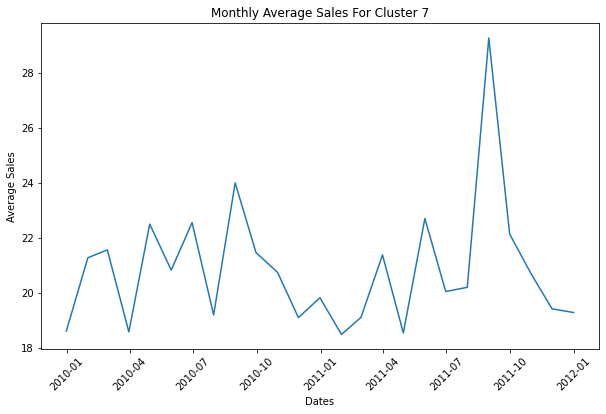

In [ ]:
# Plot Average Monthly Sale
Cluster_7_monthly_sale = Cluster_7.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_7_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 7')
plt.show()

In [ ]:
Cluster_7_daily_sale.describe()

count      739.000000
mean      2363.956766
std       2053.532713
min          0.000000
25%       1022.960000
50%       2088.690000
75%       3236.390000
max      16879.910000
Name: Sale, dtype: float64

Text(0.5, 0, 'Sales')

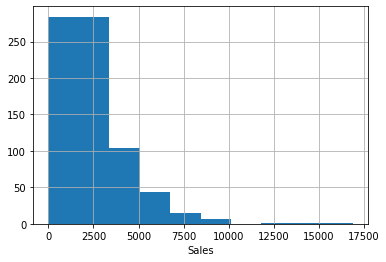

In [ ]:
Cluster_7_daily_sale.hist()
plt.xlabel('Sales')

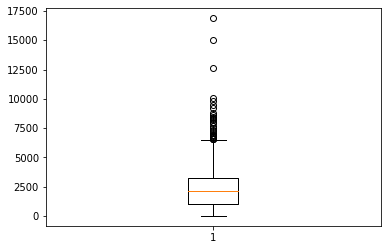

In [ ]:
plt.boxplot(Cluster_7_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of outliers. 

In [ ]:
Q1 = Cluster_7_daily_sale.quantile(0.02)
Q3 = Cluster_7_daily_sale.quantile(0.90)
IQR = Q3-Q1
print(IQR)

4895.562000000001


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_7_daily_sale = Cluster_7_daily_sale[~((Cluster_7_daily_sale < (Q1-1.5 * IQR)) |(Cluster_7_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_7_daily_sale.shape

(736,)

In [ ]:
Cluster_7_daily_sale.describe()

count      736.000000
mean      2313.053845
std       1892.821537
min          0.000000
25%        996.632500
50%       2083.505000
75%       3228.590000
max      10078.820000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_7= scaler.fit_transform(np.array(Cluster_7_daily_sale).reshape(-1,1))

### Regeression Cluster_7 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C7,y_rg_C7 = get_x_y(sales_Cluster_7, step_size)
X_rg_C7.shape, y_rg_C7.shape

X_rg_C7 = X_rg_C7.reshape(X_rg_C7.shape[0],X_rg_C7.shape[1]*1)
y_rg_C7 = y_rg_C7.reshape(y_rg_C7.shape[0])

offset = int(X_rg_C7.shape[0] * 0.9)

c7_X_train, c7_y_train = X_rg_C7 [:offset], y_rg_C7[:offset]
c7_X_test, c7_y_test = X_rg_C7[offset:], y_rg_C7[offset:]

In [ ]:
# Fitting the Stacking Model

model_stack.fit(c7_X_train, c7_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Prediction by Stacking Model

predict_train_C7 = model_stack.predict(c7_X_train)
y_prediction_c7 = model_stack.predict(c7_X_test)

In [ ]:
# Created dataframe for ploting the result


test_predict_C7 = prediction_c7.flatten()
y_test_C7 = y_test_actual.flatten()

results_C7 = pd.DataFrame(data={'Test Predictions': test_predict_C7,'Actuals': y_test_C7})
results_C7.head()

Test Predictions  Actuals
0       2233.491549  3662.96
1       3120.903742  2919.43
2       2429.639256  3694.99
3        195.803281     0.00
4       1672.252364  1076.64

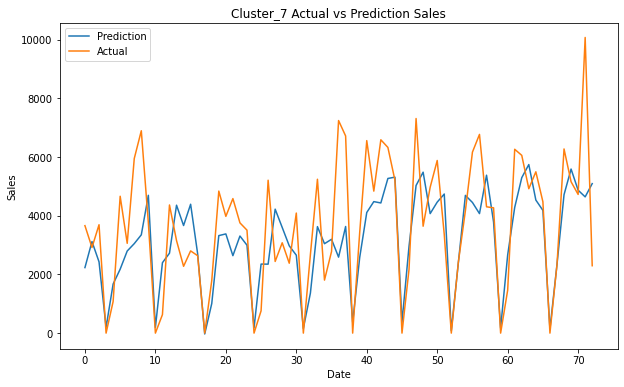

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C7['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C7['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_7 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking model Performance Evaluation For cluster 7

In [ ]:
# Stacking model Performance Evaluation

perf_metices_stacking_c7 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c7['RMSE_train'] = [math.sqrt(mean_squared_error(c7_y_train, predict_train_C7))]
# Calculate RMSE for prediaction
perf_metices_stacking_c7['RMSE_prediction'] = [math.sqrt(mean_squared_error(c7_y_test, y_prediction_c7))]
# Calculate R-Squared Score
perf_metices_stacking_c7['R-Squared'] = [r2_score(c7_y_test, y_prediction_c7)]
perf_metices_stacking_c7


RMSE_train  RMSE_prediction  R-Squared
0    0.266059          0.85711   0.480276

The performance metrices above show that the model perform better than the previous clusters. The R-Squared score is 48%.

### LSTM Model For Cluster 7 Sales Prediction

In [ ]:
step_size = 30
X_C7, y_C7 = get_x_y(sales_Cluster_7, step_size)
X_C7.shape, y_C7.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C7, y_train_C7 = X_C7[:500], y_C7[:500]
X_val_C7, y_val_C7 = X_C7[500:624], y_C7[500:624]
X_test_C7, y_test_C7 = X_C7[624:],   y_C7[624:]

X_train_C7.shape, y_train_C7.shape, X_val_C7.shape, y_val_C7.shape, X_test_C7.shape, y_test_C7.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (82, 30, 1), (82, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C7=Sequential()
model_C7.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C7.add(LSTM(50,return_sequences=True))
model_C7.add(LSTM(50))
model_C7.add(Dense(1))

model_C7.compile(optimizer='adam', loss='mse')
# fit the model
model_C7.fit(X_train_C7, y_train_C7, validation_data=(X_val_C7, y_val_C7), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 8s 146ms/step - loss: 0.8435 - val_loss: 0.8804
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7936 - val_loss: 0.8856
Epoch 3/100
16/16 [==============================] - 1s 62ms/step - loss: 0.7952 - val_loss: 0.8826
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7765 - val_loss: 0.8920
Epoch 5/100
16/16 [==============================] - 1s 61ms/step - loss: 0.7788 - val_loss: 0.8903
Epoch 6/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7549 - val_loss: 0.8876
Epoch 7/100
16/16 [==============================] - 1s 63ms/step - loss: 0.7348 - val_loss: 0.8831
Epoch 8/100
16/16 [==============================] - 1s 62ms/step - loss: 0.7288 - val_loss: 0.8677
Epoch 9/100
16/16 [==============================] - 1s 62ms/step - loss: 0.7193 - val_loss: 0.8785
Epoch 10/100
16/16 [==============================] - 1s 59ms/step - loss: 0.7150 - val_loss: 0.881

### Cluster_7 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_c7=model_C7.predict(X_train_C7)
test_predict_c7=model_C7.predict(X_test_C7)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_c7=scaler.inverse_transform(train_predict_c7)
test_predict_c7=scaler.inverse_transform(test_predict_c7)
y_train_C7 = scaler.inverse_transform(y_train_C7.reshape(-1,1))
y_test_C7 = scaler.inverse_transform(y_test_C7.reshape(-1,1))

In [ ]:
test_predict_c7 = test_predict_c7.flatten()
y_test_C7 = y_test_C7.flatten()

test_results_C7 = pd.DataFrame(data={'Test Predictions': test_predict_c7,'Actuals': y_test_C7})
test_results_C7.head()

Test Predictions      Actuals
0       2534.662842  3793.933763
1       2529.486084  9554.880033
2       2436.449707  3505.862443
3       3263.436279  4656.101422
4        107.321663  2701.311334

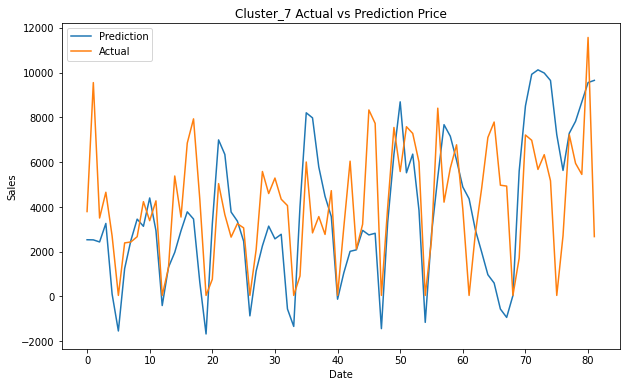

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C7['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C7['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_7 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# LSTM model Performance Evaluation

perf_metices_lstm_c7 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c7['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C7, train_predict_c7))]
# Calculate RMSE for prediaction
perf_metices_lstm_c7['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C7, test_predict_c7))]
# Calculate R-Squared Score
perf_metices_lstm_c7['R-Squared'] = [r2_score(y_test_C7, test_predict_c7)]
perf_metices_lstm_c7


RMSE_train  RMSE_prediction  R-Squared
0  859.855606      3037.475498   -0.40103

The LSTM model for this cluster is also overfitted.

### Forecasting the Sales of Cluster_7 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C7 = sales_Cluster_7[:600]
test_data_C7 = sales_Cluster_7[600:]

In [ ]:
test_data_C7.shape

(136, 1)

In [ ]:
Cluster_7_sales_forcast = forcast_10days(test_data_C7, model_C7, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_7_sales_forcast)

10

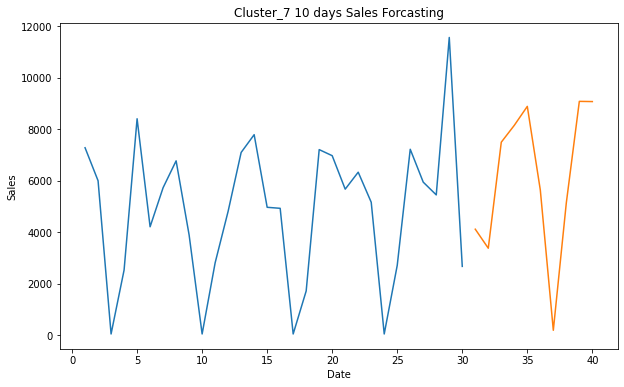

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C7[106:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_7_sales_forcast))
plt.title('Cluster_7 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

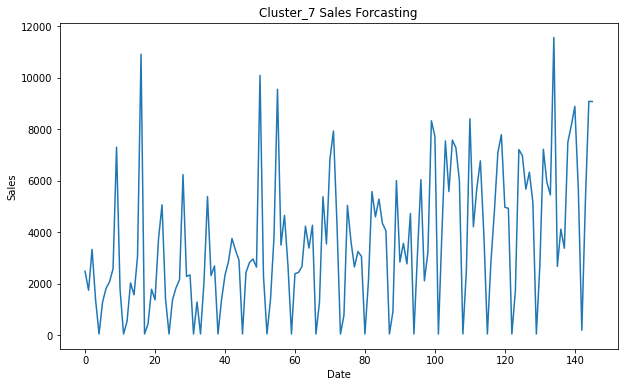

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_7=sales_Cluster_7.tolist()
new_cluster_7.extend(Cluster_7_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_7[600:]))
plt.title('Cluster_7 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c7= scaler.inverse_transform(Cluster_7_sales_forcast)
df7= pd.DataFrame(forecast_c7, columns = ['c7_forecast_sale'])

The forecasting for this cluster also well relative to the previous cluster.

## Cluster_8 Sales Prediction Model

In [ ]:
Cluster_8_daily_sale = Cluster_8.resample('D').sum()
Cluster_8_daily_sale.shape

(739,)

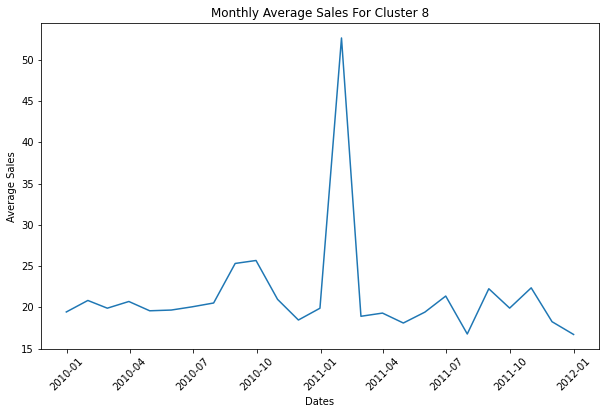

In [ ]:
# Plot Average Monthly Sale
Cluster_8_monthly_sale = Cluster_8.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_8_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 8')
plt.show()

In [ ]:
Cluster_8_daily_sale.describe()

count      739.000000
mean      2011.386414
std       3315.600404
min          0.000000
25%        854.650000
50%       1687.190000
75%       2584.320000
max      78695.760000
Name: Sale, dtype: float64

Text(0.5, 0, 'Sales')

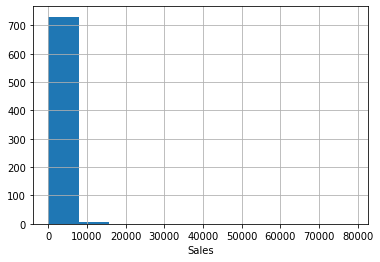

In [ ]:
Cluster_8_daily_sale.hist()
plt.xlabel('Sales')

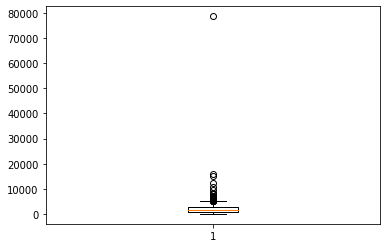

In [ ]:
plt.boxplot(Cluster_8_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of outliers. 

In [ ]:
Q1 = Cluster_8_daily_sale.quantile(0.02)
Q3 = Cluster_8_daily_sale.quantile(0.95)
IQR = Q3-Q1
print(IQR)

4902.207000000002


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_8_daily_sale = Cluster_8_daily_sale[~((Cluster_8_daily_sale < (Q1-1.5 * IQR)) |(Cluster_8_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_8_daily_sale.shape

(735,)

In [ ]:
Cluster_8_daily_sale.describe()

count      735.000000
mean      1856.469633
std       1543.391725
min          0.000000
25%        851.020000
50%       1680.140000
75%       2558.135000
max      10894.960000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_8= scaler.fit_transform(np.array(Cluster_8_daily_sale).reshape(-1,1))

### Regeression Cluster_8 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C8,y_rg_C8 = get_x_y(sales_Cluster_8, step_size)
X_rg_C8.shape, y_rg_C8.shape

X_rg_C8 = X_rg_C8.reshape(X_rg_C8.shape[0],X_rg_C8.shape[1]*1)
y_rg_C8 = y_rg_C8.reshape(y_rg_C8.shape[0])

offset = int(X_rg_C8.shape[0] * 0.9)

c8_X_train, c8_y_train = X_rg_C8 [:offset], y_rg_C8[:offset]
c8_X_test, c8_y_test = X_rg_C8[offset:], y_rg_C8[offset:]

In [ ]:
# Fitting The Stacking Model

model_stack.fit(c8_X_train, c8_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Prediction by Stacking Model

predict_train_C8 = model_stack.predict(c8_X_train)
y_prediction_c8 = model_stack.predict(c8_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c8 = scaler.inverse_transform(y_prediction_c8.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c8_y_test.reshape(-1,1))

In [ ]:
# Created dataframe for ploting the result

test_predict_C8 = prediction_c8.flatten()
y_test_C8 = y_test_actual.flatten()

results_C8 = pd.DataFrame(data={'Test Predictions': test_predict_C8,'Actuals': y_test_C8})
results_C8.head()

Test Predictions  Actuals
0       2464.689998  2814.35
1       2974.580094  2828.86
2       2327.861371  2478.88
3        209.666516     0.00
4       1305.752660   676.33

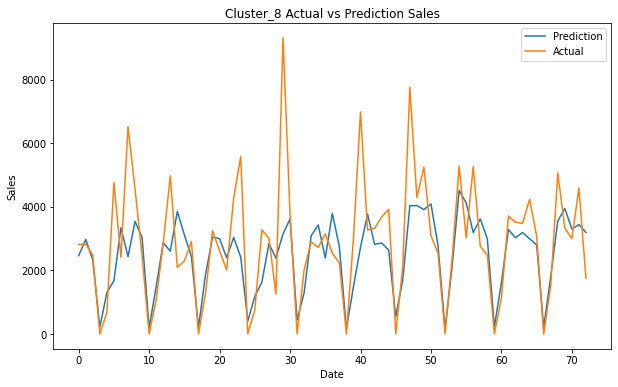

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C8['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C8['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_8 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking model Performance Evaluation For Cluster 8

In [ ]:
# Stacking model Performance Evaluation

perf_metices_stacking_c8 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c8['RMSE_train'] = [math.sqrt(mean_squared_error(c8_y_train, predict_train_C8))]
# Calculate RMSE for prediaction
perf_metices_stacking_c8['RMSE_prediction'] = [math.sqrt(mean_squared_error(c8_y_test, y_prediction_c8))]
# Calculate R-Squared Score
perf_metices_stacking_c8['R-Squared'] = [r2_score(c8_y_test, y_prediction_c8)]
perf_metices_stacking_c8


RMSE_train  RMSE_prediction  R-Squared
0    0.208585         0.941441   0.410024

The performance metrics above show that the model performed better than it did in cluster 6.

### LSTM Model For Cluster 8 Sales Prediction

In [ ]:
step_size = 30
X_C8, y_C8 = get_x_y(sales_Cluster_8, step_size)
X_C8.shape, y_C8.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C8, y_train_C8 = X_C8[:500], y_C8[:500]
X_val_C8, y_val_C8 = X_C8[500:624], y_C8[500:624]
X_test_C8, y_test_C8 = X_C8[624:],   y_C8[624:]

X_train_C8.shape, y_train_C8.shape, X_val_C8.shape, y_val_C8.shape, X_test_C8.shape, y_test_C8.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (81, 30, 1), (81, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C8=Sequential()
model_C8.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C8.add(LSTM(50,return_sequences=True))
model_C8.add(LSTM(50))
model_C8.add(Dense(1))

model_C8.compile(optimizer='adam', loss='mse')
# fit the model
model_C8.fit(X_train_C8, y_train_C8, validation_data=(X_val_C8, y_val_C8), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 8s 147ms/step - loss: 0.8896 - val_loss: 0.6332
Epoch 2/100
16/16 [==============================] - 1s 59ms/step - loss: 0.8661 - val_loss: 0.6295
Epoch 3/100
16/16 [==============================] - 1s 64ms/step - loss: 0.8509 - val_loss: 0.6339
Epoch 4/100
16/16 [==============================] - 1s 59ms/step - loss: 0.8565 - val_loss: 0.6291
Epoch 5/100
16/16 [==============================] - 1s 62ms/step - loss: 0.8484 - val_loss: 0.6289
Epoch 6/100
16/16 [==============================] - 1s 60ms/step - loss: 0.8471 - val_loss: 0.6274
Epoch 7/100
16/16 [==============================] - 1s 63ms/step - loss: 0.8263 - val_loss: 0.6190
Epoch 8/100
16/16 [==============================] - 1s 59ms/step - loss: 0.8036 - val_loss: 0.6162
Epoch 9/100
16/16 [==============================] - 1s 60ms/step - loss: 0.8001 - val_loss: 0.6123
Epoch 10/100
16/16 [==============================] - 1s 65ms/step - loss: 0.7908 - val_loss: 0.608

### Cluster_8 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C8 = model_C8.predict(X_train_C8)
test_predict_C8 = model_C8.predict(X_test_C8)

In [ ]:
# Transform the scaled Sales values back to the original Sales form

train_predict_C8 = scaler.inverse_transform(train_predict_C8)
test_predict_C8 = scaler.inverse_transform(test_predict_C8)
y_train_C8 = scaler.inverse_transform(y_train_C8.reshape(-1,1))
y_test_C8 = scaler.inverse_transform(y_test_C8.reshape(-1,1))

In [ ]:
test_predict_C8 = test_predict_C8.flatten()
y_test_C8 = y_test_C8.flatten()

test_results_C8 = pd.DataFrame(data={'Test Predictions': test_predict_C8,'Actuals': y_test_C8})
test_results_C8.head()

Test Predictions      Actuals
0       2571.789062  4172.264364
1       2983.333984  4024.044034
2       3674.759521  4294.393317
3       2996.765381  3070.341831
4        113.400032    90.218726

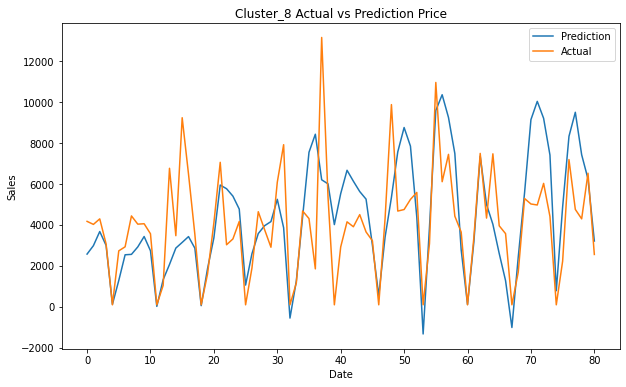

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C8['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C8['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_8 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# LSTM model Performance Evaluation

perf_metices_lstm_c8 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c8['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C8, train_predict_C8))]
# Calculate RMSE for prediaction
perf_metices_lstm_c8['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C8, test_predict_C8))]
# Calculate R-Squared Score
perf_metices_lstm_c8['R-Squared'] = [r2_score(y_test_C8, test_predict_C8)]
perf_metices_lstm_c8


RMSE_train  RMSE_prediction  R-Squared
0   953.37977      2417.404594   0.112193

The LSTM model is overfitted for this cluster too.

### Forecasting the Sales of Cluster_8 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C8 = sales_Cluster_8[:600]
test_data_C8 = sales_Cluster_8[600:]

In [ ]:
test_data_C8.shape

(135, 1)

In [ ]:
Cluster_8_sales_forcast = forcast_10days(test_data_C8, model_C8, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_8_sales_forcast)

10

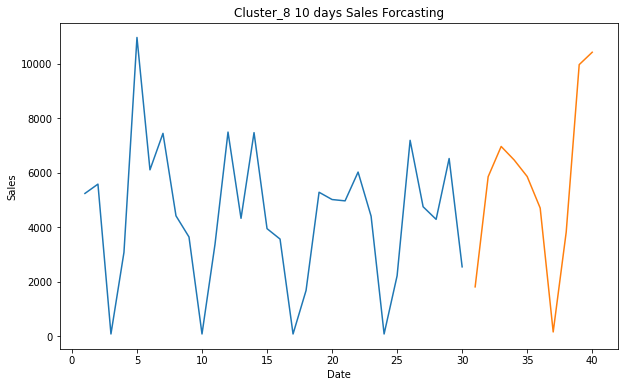

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C8[105:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_8_sales_forcast))
plt.title('Cluster_8 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

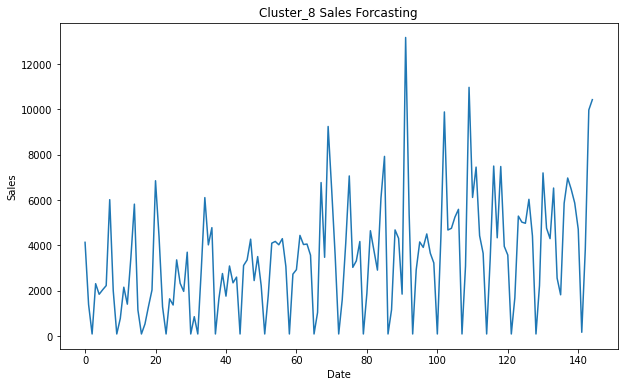

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_8 = sales_Cluster_8.tolist()
new_cluster_8.extend(Cluster_8_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_8[600:]))
plt.title('Cluster_8 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c8= scaler.inverse_transform(Cluster_8_sales_forcast)
df8= pd.DataFrame(forecast_c8, columns = ['c8_forecast_sale'])

As it is expected the forecasting for this cluster is not good since the model is too overfitted.

## Cluster_9 Sales Prediction Model

In [ ]:
Cluster_9_daily_sale = Cluster_9.resample('D').sum()
Cluster_9_daily_sale.shape

(739,)

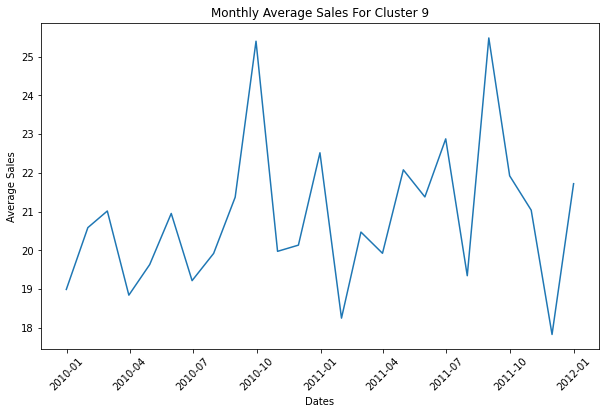

In [ ]:
# Plot Average Monthly Sale
Cluster_9_monthly_sale = Cluster_9.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_9_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 9')
plt.show()

In [ ]:
Cluster_9_daily_sale.describe()

count      739.000000
mean      3865.674414
std       3837.526283
min          0.000000
25%       1667.375000
50%       3239.850000
75%       5034.540000
max      49084.300000
Name: Sale, dtype: float64

Text(0.5, 0, 'Sales')

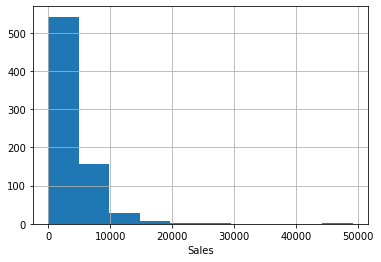

In [ ]:
Cluster_9_daily_sale.hist()
plt.xlabel('Sales')

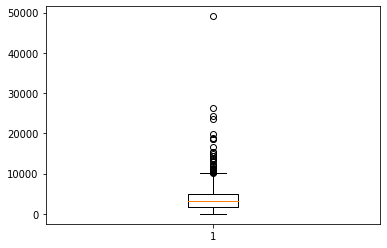

In [ ]:
plt.boxplot(Cluster_9_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of outliers. 

In [ ]:
Q1 = Cluster_9_daily_sale.quantile(0.02)
Q3 = Cluster_9_daily_sale.quantile(0.95)
IQR = Q3-Q1
print(IQR)

10076.293000000005


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_9_daily_sale = Cluster_9_daily_sale[~((Cluster_9_daily_sale < (Q1-1.5 * IQR)) |(Cluster_9_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_9_daily_sale.shape

(737,)

In [ ]:
Cluster_9_daily_sale.describe()

count      737.000000
mean      3773.795539
std       3360.418635
min          0.000000
25%       1659.380000
50%       3233.810000
75%       5025.150000
max      24219.450000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_9= scaler.fit_transform(np.array(Cluster_9_daily_sale).reshape(-1,1))

### Regeression Cluster_9 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C9,y_rg_C9 = get_x_y(sales_Cluster_9, step_size)
X_rg_C9.shape, y_rg_C9.shape

X_rg_C9 = X_rg_C9.reshape(X_rg_C9.shape[0],X_rg_C9.shape[1]*1)
y_rg_C9 = y_rg_C9.reshape(y_rg_C9.shape[0])

offset = int(X_rg_C9.shape[0] * 0.9)

c9_X_train, c9_y_train = X_rg_C9 [:offset], y_rg_C9[:offset]
c9_X_test, c9_y_test = X_rg_C9[offset:], y_rg_C9[offset:]

In [ ]:
# Fit The Stacking Model

model_stack.fit(c9_X_train, c9_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Prediction by Stacking Model

predict_train_C9 = model_stack.predict(c9_X_train)
y_prediction_c9 = model_stack.predict(c9_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c9 = scaler.inverse_transform(y_prediction_c9.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c9_y_test.reshape(-1,1))

In [ ]:
# Created dataframe for ploting the result

test_predict_C9 = prediction_c9.flatten()
y_test_C9 = y_test_actual.flatten()

results_C9 = pd.DataFrame(data={'Test Predictions': test_predict_C9,'Actuals': y_test_C9})
results_C9.head()

Test Predictions  Actuals
0       6103.400378  5530.03
1       5940.363452  5725.07
2       5107.205383  4615.48
3        172.553690     0.00
4       3456.696972  2023.95

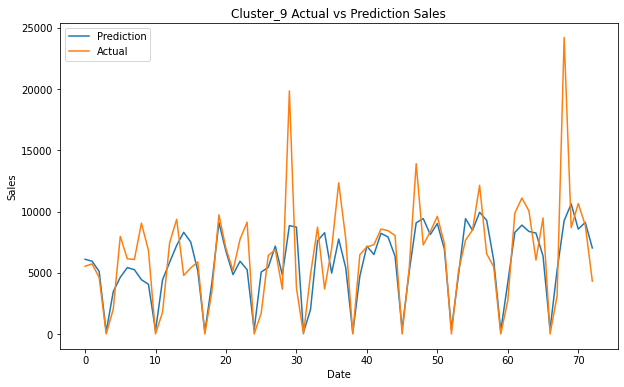

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C9['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C9['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_9 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking model Performance Evaluation For Cluster 9

In [ ]:
# Stacking model Performance Evaluation

perf_metices_stacking_c9 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c9['RMSE_train'] = [math.sqrt(mean_squared_error(c9_y_train, predict_train_C9))]
# Calculate RMSE for prediaction
perf_metices_stacking_c9['RMSE_prediction'] = [math.sqrt(mean_squared_error(c9_y_test, y_prediction_c9))]
# Calculate R-Squared Score
perf_metices_stacking_c9['R-Squared'] = [r2_score(c9_y_test, y_prediction_c9)]
perf_metices_stacking_c9


RMSE_train  RMSE_prediction  R-Squared
0    0.268866         0.880566    0.52365

The performance metrice above show that the model performed better than all the other pervious clusters with 52% score for R-Squared.

### LSTM Model For Cluster 9 Sales Prediction

In [ ]:
step_size = 30
X_C9, y_C9 = get_x_y(sales_Cluster_9, step_size)
X_C9.shape, y_C9.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C9, y_train_C9 = X_C9[:500], y_C9[:500]
X_val_C9, y_val_C9 = X_C9[500:624], y_C9[500:624]
X_test_C9, y_test_C9 = X_C9[624:],   y_C9[624:]

X_train_C9.shape, y_train_C9.shape, X_val_C9.shape, y_val_C9.shape, X_test_C9.shape, y_test_C9.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (83, 30, 1), (83, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C9=Sequential()
model_C9.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C9.add(LSTM(50,return_sequences=True))
model_C9.add(LSTM(50))
model_C9.add(Dense(1))

model_C9.compile(optimizer='adam', loss='mse')
# fit the model
model_C9.fit(X_train_C9, y_train_C9, validation_data=(X_val_C9, y_val_C9), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 8s 145ms/step - loss: 0.8043 - val_loss: 0.7451
Epoch 2/100
16/16 [==============================] - 1s 61ms/step - loss: 0.7831 - val_loss: 0.7559
Epoch 3/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7686 - val_loss: 0.7564
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7672 - val_loss: 0.7533
Epoch 5/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7586 - val_loss: 0.7476
Epoch 6/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7437 - val_loss: 0.7473
Epoch 7/100
16/16 [==============================] - 1s 61ms/step - loss: 0.7253 - val_loss: 0.7345
Epoch 8/100
16/16 [==============================] - 1s 60ms/step - loss: 0.6940 - val_loss: 0.7384
Epoch 9/100
16/16 [==============================] - 1s 60ms/step - loss: 0.7070 - val_loss: 0.7208
Epoch 10/100
16/16 [==============================] - 1s 63ms/step - loss: 0.6886 - val_loss: 0.749

### Cluster_9 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C9 = model_C9.predict(X_train_C9)
test_predict_C9  = model_C9.predict(X_test_C9)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_C9 = scaler.inverse_transform(train_predict_C9)
test_predict_C9 = scaler.inverse_transform(test_predict_C9)
y_train_C9 = scaler.inverse_transform(y_train_C9.reshape(-1,1))
y_test_C9 = scaler.inverse_transform(y_test_C9.reshape(-1,1))

In [ ]:
#Put the results into the dataframe for visualization

test_predict_C9 = test_predict_C9.flatten()
y_test_C9 = y_test_C9.flatten()

test_results_C9 = pd.DataFrame(data={'Test Predictions': test_predict_C9,'Actuals': y_test_C9})
test_results_C9.head()

Test Predictions      Actuals
0       1190.327026  1290.560547
1       3060.186523  5952.574467
2       2417.098633  7917.280517
3       1826.507202  5246.791958
4        664.778809  3922.568387

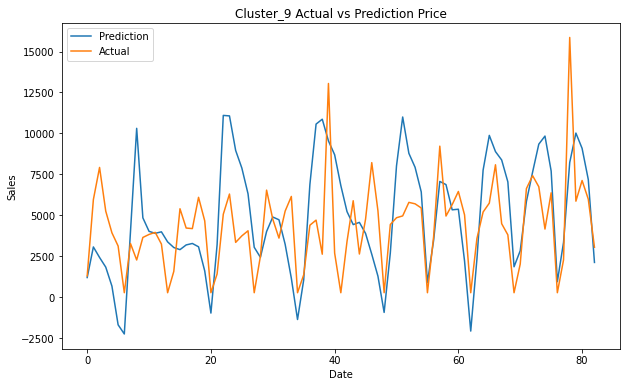

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C9['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C9['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_9 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# LSTM model Performance Evaluation

perf_metices_lstm_c9 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c9['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C9, train_predict_C9))]
# Calculate RMSE for prediaction
perf_metices_lstm_c9['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C9, test_predict_C9))]
# Calculate R-Squared Score
perf_metices_lstm_c9['R-Squared'] = [r2_score(y_test_C9, test_predict_C9)]
perf_metices_lstm_c9


RMSE_train  RMSE_prediction  R-Squared
0  1008.117898      3269.806788  -0.465111

The LSTM model for cluster 9 did not work well. It is too overfitted.

### Forecasting the Sales of Cluster_9 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C9 = sales_Cluster_9[:600]
test_data_C9 = sales_Cluster_9[600:]

In [ ]:
test_data_C9.shape

(137, 1)

In [ ]:
Cluster_9_sales_forcast = forcast_10days(test_data_C9, model_C9, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_9_sales_forcast)

10

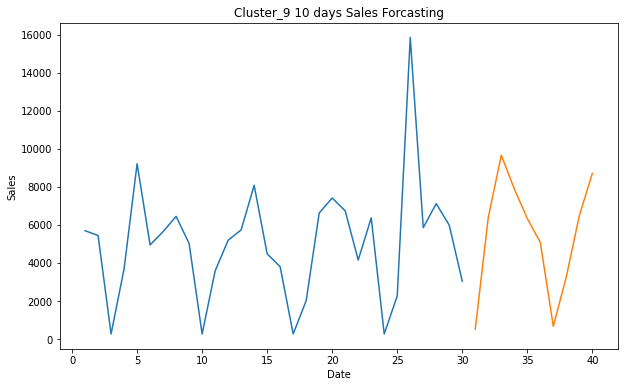

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C9[107:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_9_sales_forcast))
plt.title('Cluster_9 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

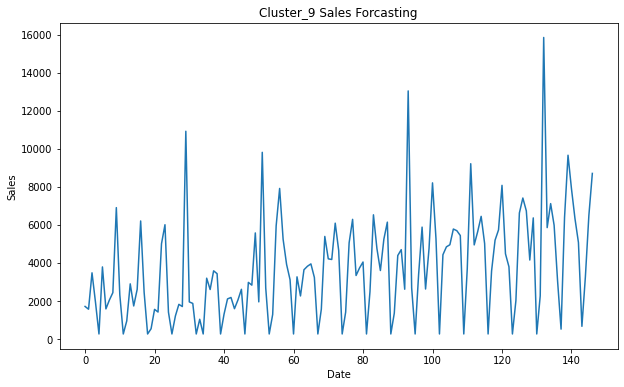

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_9=sales_Cluster_9.tolist()
new_cluster_9.extend(Cluster_9_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_9[600:]))
plt.title('Cluster_9 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c9= scaler.inverse_transform(Cluster_9_sales_forcast)
df9= pd.DataFrame(forecast_c9, columns = ['c9_forecast_sale'])

The forecasting is not worse than others.

## Cluster_10 Sales Prediction Model

In [ ]:
Cluster_10_daily_sale = Cluster_10.resample('D').sum()
Cluster_10_daily_sale.shape

(739,)

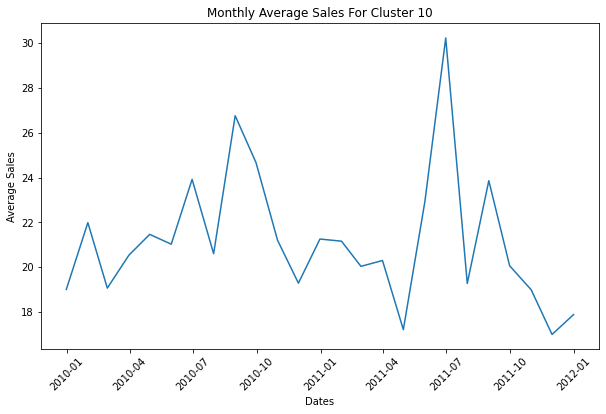

In [ ]:
# Plot Average Monthly Sale
Cluster_10_monthly_sale = Cluster_10.resample('m').mean()
plt.figure(figsize=(10,6))
plt.plot(Cluster_10_monthly_sale)

plt.xlabel('Dates')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.title('Monthly Average Sales For Cluster 10')
plt.show()

In [ ]:
Cluster_10_daily_sale.describe()

count      739.000000
mean      2856.621383
std       3007.063277
min          0.000000
25%       1275.455000
50%       2481.310000
75%       3735.495000
max      42266.960000
Name: Sale, dtype: float64

Text(0.5, 0, 'Sales')

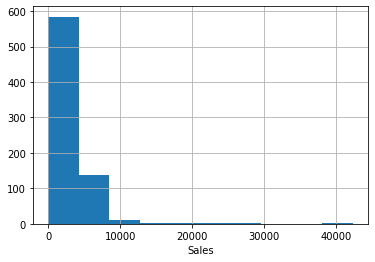

In [ ]:
Cluster_10_daily_sale.hist()
plt.xlabel('Sales')

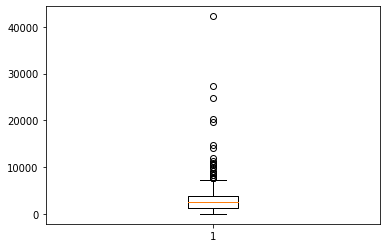

In [ ]:
plt.boxplot(Cluster_10_daily_sale);

From the above graph we can see there is an outliers, to help the model perform better it is better to take care of outliers. 

In [ ]:
Q1 = Cluster_10_daily_sale.quantile(0.02)
Q3 = Cluster_10_daily_sale.quantile(0.95)
IQR = Q3-Q1
print(IQR)

6673.343000000006


In [ ]:
#New dataframe after removing the outliers Using modified IQR
Cluster_10_daily_sale = Cluster_10_daily_sale[~((Cluster_10_daily_sale < (Q1-1.5 * IQR)) |(Cluster_10_daily_sale > (Q3+1.5 * IQR)))]#.any(axis=1)]
Cluster_10_daily_sale.shape

(734,)

In [ ]:
Cluster_10_daily_sale.describe()

count      734.000000
mean      2693.004771
std       2163.850193
min          0.000000
25%       1270.715000
50%       2467.110000
75%       3708.712500
max      14725.970000
Name: Sale, dtype: float64

In [ ]:
# Scale the data

scaler = StandardScaler()
sales_Cluster_10= scaler.fit_transform(np.array(Cluster_10_daily_sale).reshape(-1,1))

### Regeression Cluster_10 Sales Prediction Model

In [ ]:
### splitting dataset into training and testing part.

step_size = 10
X_rg_C10,y_rg_C10 = get_x_y(sales_Cluster_10, step_size)
X_rg_C10.shape, y_rg_C10.shape

X_rg_C10 = X_rg_C10.reshape(X_rg_C10.shape[0],X_rg_C10.shape[1]*1)
y_rg_C10 = y_rg_C10.reshape(y_rg_C10.shape[0])

offset = int(X_rg_C10.shape[0] * 0.9)

c10_X_train, c10_y_train = X_rg_C10 [:offset], y_rg_C10[:offset]
c10_X_test, c10_y_test = X_rg_C10[offset:], y_rg_C10[offset:]

In [ ]:
# Fitting The Stacking Model

model_stack.fit(c10_X_train, c10_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


StackingRegressor(cv=5,
                  estimators=[('xtr', ExtraTreesRegressor()),
                              ('abr', AdaBoostRegressor()),
                              ('rfr', RandomForestRegressor()),
                              ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [ ]:
# Model Prediction by Stacking Model

predict_train_C10 = model_stack.predict(c10_X_train)
y_prediction_c10 = model_stack.predict(c10_X_test)

In [ ]:
# Transform the scaled Sales back to the original Sales form

prediction_c10 = scaler.inverse_transform(y_prediction_c10.reshape(-1,1))
y_test_actual = scaler.inverse_transform(c10_y_test.reshape(-1,1))

In [ ]:
# Created dataframe for ploting the result

test_predict_C10 = prediction_c10.flatten()
y_test_C10 = y_test_actual.flatten()

results_C10 = pd.DataFrame(data={'Test Predictions': test_predict_C10,'Actuals': y_test_C10})
results_C10.head()

Test Predictions  Actuals
0       3947.405836  3994.01
1       4817.580322  3680.28
2       3368.885533  4727.05
3       -171.077331     0.00
4       2075.236019   790.44

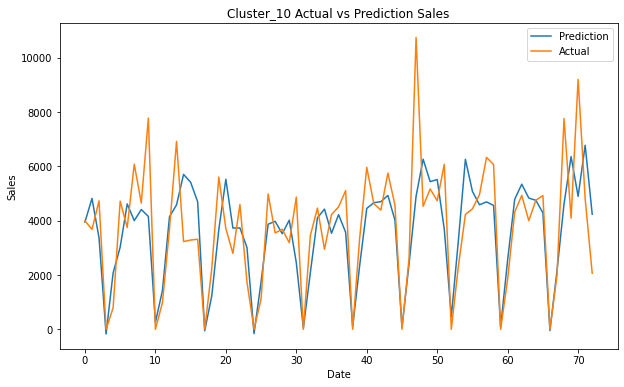

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(results_C10['Test Predictions'][-100:], label = 'Prediction')
plt.plot(results_C10['Actuals'][-100:], label= 'Actual')
plt.title('Cluster_10 Actual vs Prediction Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Stacking model Performance Evaluation For Cluster 10

In [ ]:
# Stacking model Performance Evaluation

perf_metices_stacking_c10 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_stacking_c10['RMSE_train'] = [math.sqrt(mean_squared_error(c10_y_train, predict_train_C10))]
# Calculate RMSE for prediaction
perf_metices_stacking_c10['RMSE_prediction'] = [math.sqrt(mean_squared_error(c10_y_test, y_prediction_c10))]
# Calculate R-Squared Score
perf_metices_stacking_c10['R-Squared'] = [r2_score(c10_y_test, y_prediction_c10)]
perf_metices_stacking_c10


RMSE_train  RMSE_prediction  R-Squared
0    0.235835         0.713779   0.522853

The performance metrics above show that the model in this cluster performed as same as cluster 9, which is better than it performed in other clusters

### LSTM Model For Cluster 10 Sales Prediction

In [ ]:
step_size = 30
X_C10, y_C10 = get_x_y(sales_Cluster_10, step_size)
X_C10.shape, y_C10.shape

# Split the data into train, validation and test
test_size = 0.15
X_train_C10, y_train_C10 = X_C10[:500], y_C10[:500]
X_val_C10, y_val_C10 = X_C10[500:624], y_C10[500:624]
X_test_C10, y_test_C10 = X_C10[624:],   y_C10[624:]

X_train_C10.shape, y_train_C10.shape, X_val_C10.shape, y_val_C10.shape, X_test_C10.shape, y_test_C10.shape

((500, 30, 1), (500, 1), (124, 30, 1), (124, 1), (80, 30, 1), (80, 1))

In [ ]:
# Build the LSTM Model
n_features = 1  
n_steps = step_size

model_C10=Sequential()
model_C10.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model_C10.add(LSTM(50,return_sequences=True))
model_C10.add(LSTM(50))
model_C10.add(Dense(1))

model_C10.compile(optimizer='adam', loss='mse')
# fit the model
model_C10.fit(X_train_C10, y_train_C10, validation_data=(X_val_C10, y_val_C10), epochs=100, verbose=1)



Epoch 1/100
16/16 [==============================] - 8s 147ms/step - loss: 0.9432 - val_loss: 0.7139
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 0.9029 - val_loss: 0.7221
Epoch 3/100
16/16 [==============================] - 1s 63ms/step - loss: 0.8802 - val_loss: 0.7284
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.8632 - val_loss: 0.7385
Epoch 5/100
16/16 [==============================] - 1s 61ms/step - loss: 0.8468 - val_loss: 0.7439
Epoch 6/100
16/16 [==============================] - 1s 60ms/step - loss: 0.8725 - val_loss: 0.7401
Epoch 7/100
16/16 [==============================] - 1s 59ms/step - loss: 0.8334 - val_loss: 0.7292
Epoch 8/100
16/16 [==============================] - 1s 60ms/step - loss: 0.8376 - val_loss: 0.7369
Epoch 9/100
16/16 [==============================] - 1s 61ms/step - loss: 0.8249 - val_loss: 0.7344
Epoch 10/100
16/16 [==============================] - 1s 61ms/step - loss: 0.8203 - val_loss: 0.735

### Cluster_10 Prediction And Check Prformance Metrics

In [ ]:
# As we splited our data into three parts, the next will see how our model works on unseen test data.
train_predict_C10 = model_C10.predict(X_train_C10)
test_predict_C10 = model_C10.predict(X_test_C10)

In [ ]:
# Transform the scaled Sales back to the original Sales form

train_predict_C10 = scaler.inverse_transform(train_predict_C10)
test_predict_C10 = scaler.inverse_transform(test_predict_C10)
y_train_C10 = scaler.inverse_transform(y_train_C10.reshape(-1,1))
y_test_C10 = scaler.inverse_transform(y_test_C10.reshape(-1,1))

In [ ]:
test_predict_C10 = test_predict_C10.flatten()
y_test_C10 = y_test_C10.flatten()

test_results_C10 = pd.DataFrame(data={'Test Predictions': test_predict_C10,'Actuals': y_test_C10})
test_results_C10.head()

Test Predictions   Actuals
0       2634.195068  4713.410
1       3194.409668  6934.550
2       2826.420410  4173.630
3       -172.482040     0.000
4       4409.699219  2727.501

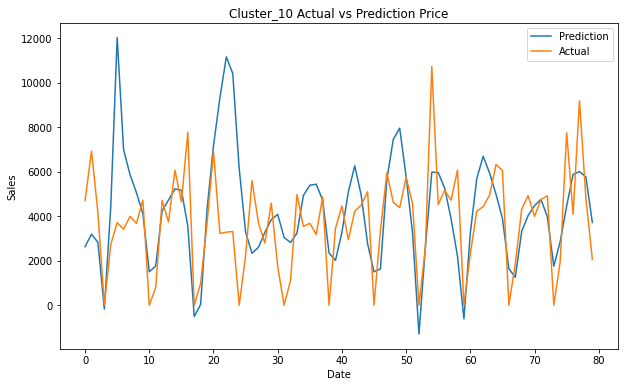

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_results_C10['Test Predictions'][-200:], label = 'Prediction')
plt.plot(test_results_C10['Actuals'][-200:], label= 'Actual')
plt.title('Cluster_10 Actual vs Prediction Price')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# LSTM model Performance Evaluation

perf_metices_lstm_c10 = pd.DataFrame()
# Calculate RMSE for train
perf_metices_lstm_c10['RMSE_train'] = [math.sqrt(mean_squared_error(y_train_C10, train_predict_C10))]
# Calculate RMSE for prediaction
perf_metices_lstm_c10['RMSE_prediction'] = [math.sqrt(mean_squared_error(y_test_C10, test_predict_C10))]
# Calculate R-Squared Score
perf_metices_lstm_c10['R-Squared'] = [r2_score(y_test_C10, test_predict_C10)]
perf_metices_lstm_c10


RMSE_train  RMSE_prediction  R-Squared
0  1064.620014        2537.8627  -0.318024

The model performance on this cluster is not good. It is overfitted.

### Forecasting the Sales of Cluster_10 for the next 10 days 

In [ ]:
# We split the data into train and test for simplicity of our function

train_data_C10 = sales_Cluster_10[:600]
test_data_C10 = sales_Cluster_10[600:]

In [ ]:
test_data_C10.shape

(134, 1)

In [ ]:
Cluster_10_sales_forcast = forcast_10days(test_data_C10, model_C10, 30, 10)

#The output shows that look back 30 days and forecast the next value for each 10 days

In [ ]:
len(Cluster_10_sales_forcast)

10

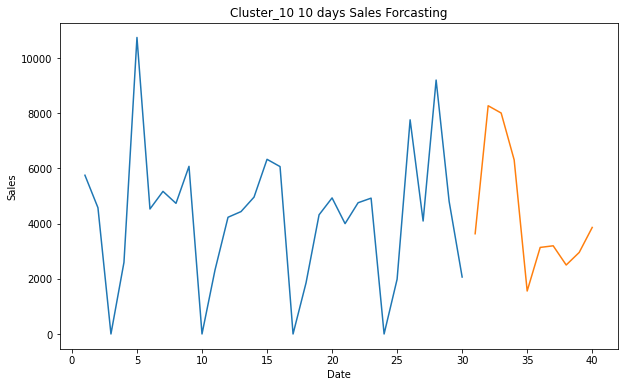

In [ ]:
# Plot the last 30 days plus 10 days future, total 40 days 

day_new = np.arange(1,31)
day_pred = np.arange(31,41)
plt.figure(figsize=(10,6))
plt.plot(day_new,scaler.inverse_transform(test_data_C10[104:]))
plt.plot(day_pred,scaler.inverse_transform(Cluster_10_sales_forcast))
plt.title('Cluster_10 10 days Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

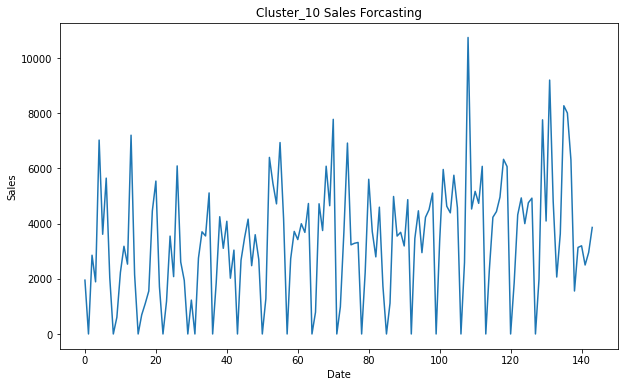

In [ ]:
# Plot all the data including the 10 days forcast values, for clear visualization we took only after 600 days.

plt.figure(figsize=(10,6))
new_cluster_10=sales_Cluster_10.tolist()
new_cluster_10.extend(Cluster_10_sales_forcast)
plt.plot(scaler.inverse_transform(new_cluster_10[600:]))
plt.title('Cluster_10 Sales Forcasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast_c10= scaler.inverse_transform(Cluster_10_sales_forcast)
df10= pd.DataFrame(forecast_c10, columns = ['c10_forecast_sale'])

The forecasting of the model for this clsuter also not good .

We put all the forecacting values for each cluster in one dataframe and visualized it to see how the retailer would have done for the next 10 days after the last day of the test dataset.

In [ ]:
# Concatenate all forecast dataframes from all clusters
df_forecast =result = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)

In [ ]:
df_forecast.index

RangeIndex(start=0, stop=10, step=1)

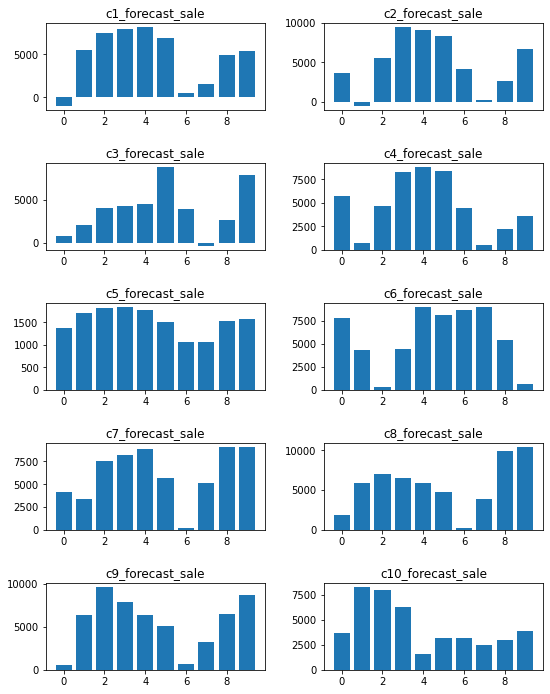

In [ ]:
plt.figure(figsize=(8, 10))
cols = df_forecast.columns
k = 0

for i,j in zip(range(len(cols)), cols):
    k += 1
    plt.subplot(5, 2, k)
    plt.bar(df_forecast.index, df_forecast.iloc[:, i])
    plt.tight_layout(2.0)

    
    plt.title(j)

## Conclusion

This e-commerce data has given us the opportunity to explore many important aspects of datascience. We are able to have hands on experiance on tableau for data exploration and visualization. We also have a better understand about topic modeling and Natural Languge Processing in general. We manged to build a good topic modeling that performed more than 60% of coherence score and can be able to classify the descriptions of products into 10 major topics. Finally, we can be able to build sales prediction model for each cluster that yielded from the LDA model. We also got the experiance to work on timeseries data anlysis and be able to extract the X and y features from one variable that is sales. Therefore, we can use any models to predict the sales for individual cluster. We built and tried various models for the first cluster and finally we decided to use only two models. The first is the stacking model which is an ensemble model that boosted the performance than the individual model in each cluster. With the stacking model we are able to run the same model for all clusters. The second model that we applied in this analysis was the LSTM model which we thought it would be great to try since it can handle sequential data very well. However, since our data for individual cluster is too small, the LSTM model was overfiitted to those individual cluster. The LSTM forecasting for 10 days was not bad and we think the LSTM model performed fair enough for this analysis. If we have had more data entries in each cluster, we would have gotten a better result from LSTM model.  